Visualizacion de datos usando matplotlib y seaborn en data tabular y geoespacial.</font>

# Uber Dataset Perú

Este conjunto de datos proviene de una startup de movilidad que permite a cualquier usuario reservar un viaje desde cualquier punto A hasta cualquier punto B dentro de la ciudad utilizando un teléfono inteligente. El valor del viaje se calcula automáticamente en el momento de la solicitud mediante la aplicación, teniendo en cuenta la distancia, el tiempo de viaje estimado y la disponibilidad actual de vehículos (equilibrio entre la demanda y la oferta).

Una vez que el viaje termina, cargamos la tarjeta de crédito del pasajero y transferimos X% de este valor a la cuenta bancaria del conductor. Finalmente, antes de que el pasajero sea recogido, el viaje puede ser cancelado tanto por el conductor como por el pasajero.

Un análisis descriptivo de los datos podría incluir:

- ¿Cuántos? (por ejemplo, vehículos, pasajeros, conductores).
- ¿Cuándo? (por ejemplo, viajes/precio/costo por período de tiempo, ¿son los viajes rápidos?).
- ¿Qué? (por ejemplo, reservas/inmediatas, tipo de vehículo).
- ¿Quiénes? (por ejemplo, peores pasajeros, mejores conductores).
- Cualquier pregunta que consideres interesante.

## Análisis Inicial del Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns = 300

In [ ]:
#data = pd.read_csv('uber_peru_2010.csv', sep=';')
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/uber_peru_2010.csv', sep=';')

In [ ]:
data.head(5)

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type          start_at     start_lat     start_lon  \
0  executive       asap  16/11/2010 16:44  -12,13983536  -77,02355957   
1  executive       asap   01/06/2010 0:34  -12,13874817  -76,99536133   
2  executive       asap   31/05/2010 5:01  -12,12453079  -77,02780151   
3  executive       asap   01/06/2010 0:29  -12,13885117  -76,99530029   
4  executive   reserved  11/09/2010 23:55  -12,08995438  -76,92626953   

             end_at       end_lat       end_lon  end_state driver_start_lat  \
0  16/11/2010 17:29  -12,05537033   -77,0413208   drop off     -12,10825481   
1   01/06/2010 0:37  -12,12465668  -77,02886963  not found              NaN   
2   31/05/2010 5:04  -12,13883209  -76,99530029  not found              NaN   
3   01/06/2010 0:32  -12,12458801  -77,02896118  not found              NaN   
4   12/09/2010 1:07  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon        arrived_at currency   price  price_distance  \
0      -77,0272739  16/11/2010 17:02      PEN  3821.0          3626.0   
1              NaN               NaN      PEN     0.0             NaN   
2              NaN               NaN      PEN     0.0             NaN   
3              NaN               NaN      PEN     0.0             NaN   
4      -76,9277072  11/09/2010 23:50      PEN  8227.0          7665.0   

   price_duration  distance  duration    cost  cost_distance  cost_duration  \
0           195.0   11331.0     234.0     0.0            0.0            0.0   
1             NaN       0.0       0.0     0.0            NaN            NaN   
2             NaN       0.0       0.0     0.0            NaN            NaN   
3             NaN       0.0       0.0     0.0            NaN            NaN   
4           562.0   30270.0     715.0  6173.0         5756.0          417.0   

   source  driver_score  rider_score  
0  iPhone           5.0          5.0  
1  iPhone           NaN          NaN  
2  iPhone           NaN          NaN  
3  iPhone           NaN          NaN  
4  iPhone           4.0          5.0


1.  tamaño del dataframe, cantidad de filas y de columnas

In [ ]:
#---------------------------------------
tamaño = data.shape
cantidad_filas = tamaño[0]
cantidad_columnas = tamaño[1]
tamaño
#---------------------------------------


(23111, 28)

In [ ]:
#---------------------------------------
cantidad_filas
#---------------------------------------

23111

In [ ]:
#---------------------------------------
cantidad_columnas
#---------------------------------------

28

Visualizamos los primeros 5 elementos del dataframe

Para poder visualizar todas las columnas:

In [ ]:
pd.set_option('display.max_columns', None)

2. cantidad y proporción de valores nulos por cada columna.
 - ¿Qué conclusiones o qué tratamiento le podemos dar a los datos faltantes?
 - Los datos faltan por error de lectura o por alguna otra razón?

In [ ]:
nulos_x_columna = data.isnull().sum()


propor_nulos = data.isnull().mean()

In [ ]:
#---------------------------------------
tabla_nulos = pd.DataFrame({
    'CANTIDAD NULOS': nulos_x_columna,
    'PROPORCION NULOS': propor_nulos
})
tabla_nulos
#---------------------------------------

CANTIDAD NULOS  PROPORCION NULOS
journey_id                     0          0.000000
user_id                        0          0.000000
driver_id                   3385          0.146467
taxi_id                     3385          0.146467
icon                           0          0.000000
start_type                     0          0.000000
start_at                       0          0.000000
start_lat                      0          0.000000
start_lon                      0          0.000000
end_at                       276          0.011942
end_lat                        0          0.000000
end_lon                        0          0.000000
end_state                     12          0.000519
driver_start_lat            3490          0.151010
driver_start_lon            3490          0.151010
arrived_at                  5395          0.233439
currency                       0          0.000000
price                        398          0.017221
price_distance              3170          0.137164
price_duration              3170          0.137164
distance                     263          0.011380
duration                     263          0.011380
cost                        1351          0.058457
cost_distance               5073          0.219506
cost_duration               5073          0.219506
source                       123          0.005322
driver_score               15461          0.668989
rider_score                 7721          0.334083

## **¿Qué conclusiones o qué tratamiento le podemos dar a los datos faltantes?**

### Variables con datos faltantes significativos:

- **driver_score**: 66.9% de valores nulos
- **rider_score**: 33.4% de valores nulos
- **arrived_at**: 23.3% de valores nulos
- **cost_distance** y **cost_duration**: 21.9% de valores nulos cada uno
- **driver_id** y **taxi_id**: 14.6% de valores nulos
- Estas columnas con altos porcentajes de valores nulos podrían indicar problemas serios con los datos o la falta de registro en ciertas situaciones.

### Variables con pocos datos faltantes:

- **end_at**: 1.19% de valores nulos
- **distance** y **duration**: 1.13% de valores nulos
- **source**: 0.53% de valores nulos
- Estas columnas tienen relativamente pocos datos faltantes, lo que puede deberse a pequeños errores o casos específicos.

## Tratamientos

**Eliminar Filas o Columnas con Muchos Nulos**
- Si una columna tiene **demasiados valores nulos** y no es crucial para el análisis (como `driver_score` con 66.9% de nulos), puedes eliminarla.
```python
# Eliminar columna con demasiados nulos
data_limpio = data.drop(columns=['driver_score'])
# Eliminar filas con cualquier valor nulo
data_limpio = data.dropna()
```

**Imputación de Datos**
- Media o mediana: Para variables numéricas como **price** o **distance**.
Si los valores faltantes no son numerosos, puedes usar la media o mediana:
```python
data['price'].fillna(data['price'].mean(), inplace=True)
```
- Moda: Para variables categóricas como source, puedes usar el valor más frecuente.
```python
data['source'].fillna(data['source'].mode()[0], inplace=True)
```

**Asignar un Valor Especial**
- En algunos casos, puedes asignar un valor especial, como -1 o "no completado".
Esto es útil para columnas como **arrived_at**, donde los valores nulos representan viajes incompletos.

**Imputación Avanzada con Modelos Predictivos**
- Usar modelos predictivos (como regresión) para estimar variables faltantes en función de otras columnas relevantes.

# **Los datos faltan por error de lectura o por alguna otra razón?**
- Si, y tambien por otras razones.
## Errores de lectura o registro:

- Puede ocurrir si los sensores o dispositivos no captan los datos correctamente (por ejemplo, GPS con señal débil).
- Registros incompletos al momento de la captura o errores en la transmisión de datos.
## Registros incompletos por lógica del proceso:

- **arrived_at**: Es posible que algunos viajes nunca se completaron o fueron cancelados.
- **driver_score** y **rider_score**: Pueden faltar porque no todos los usuarios o conductores califican el servicio al final del viaje.
- **cost_distance** y **cost_duration**: Podría ser que en algunos viajes no se calcularon costos por distancias o tiempo.
## Problemas con el flujo del sistema:

- Los IDs de conductores y taxis pueden faltar si no se asignó un conductor al momento del registro.
- Algunos valores como **source** pueden faltar si la información de origen no se capturó correctamente.


In [ ]:
len(data)

23111

In [ ]:
# Journey_id corresponde a un id único de cada viaje. Entonces la cantidad única de journey_id corresponde al total de filas del dataset.
data['journey_id'].nunique()

23111

In [ ]:
# Existen 1390 usuarios distintos
data['user_id'].nunique()

1390

In [ ]:
# Y 168 drivers
data['driver_id'].nunique()

168

## Análisis Univariado

In [ ]:
for columna in data.columns:
    conteo_valores_unicos = data[columna].nunique()
    print(f"Columna '{columna}': {conteo_valores_unicos} valores únicos")

Columna 'journey_id': 23111 valores únicos
Columna 'user_id': 1390 valores únicos
Columna 'driver_id': 168 valores únicos
Columna 'taxi_id': 213 valores únicos
Columna 'icon': 3 valores únicos
Columna 'start_type': 3 valores únicos
Columna 'start_at': 20987 valores únicos
Columna 'start_lat': 11753 valores únicos
Columna 'start_lon': 8489 valores únicos
Columna 'end_at': 21780 valores únicos
Columna 'end_lat': 12266 valores únicos
Columna 'end_lon': 9084 valores únicos
Columna 'end_state': 6 valores únicos
Columna 'driver_start_lat': 18425 valores únicos
Columna 'driver_start_lon': 18314 valores únicos
Columna 'arrived_at': 17156 valores únicos
Columna 'currency': 1 valores únicos
Columna 'price': 5456 valores únicos
Columna 'price_distance': 5778 valores únicos
Columna 'price_duration': 2676 valores únicos
Columna 'distance': 8392 valores únicos
Columna 'duration': 2958 valores únicos
Columna 'cost': 4098 valores únicos
Columna 'cost_distance': 4625 valores únicos
Columna 'cost_durati

In [ ]:
data.nunique()

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            20987
start_lat           11753
start_lon            8489
end_at              21780
end_lat             12266
end_lon              9084
end_state               6
driver_start_lat    18425
driver_start_lon    18314
arrived_at          17156
currency                1
price                5456
price_distance       5778
price_duration       2676
distance             8392
duration             2958
cost                 4098
cost_distance        4625
cost_duration        2060
source                  5
driver_score            6
rider_score             6
dtype: int64

In [ ]:
# Obtener y almacenar la cantidad única de valores por cada columna
conteo_valores_unicos = data.nunique().reset_index()
conteo_valores_unicos.columns = ['Columna', 'Unique_values']

# Mostrar el DataFrame con el conteo de valores únicos
conteo_valores_unicos.sort_values('Unique_values')

Columna  Unique_values
16          currency              1
4               icon              3
5         start_type              3
25            source              5
27       rider_score              6
12         end_state              6
26      driver_score              6
2          driver_id            168
3            taxi_id            213
1            user_id           1390
24     cost_duration           2060
19    price_duration           2676
21          duration           2958
22              cost           4098
23     cost_distance           4625
17             price           5456
18    price_distance           5778
20          distance           8392
8          start_lon           8489
11           end_lon           9084
7          start_lat          11753
10           end_lat          12266
15        arrived_at          17156
14  driver_start_lon          18314
13  driver_start_lat          18425
6           start_at          20987
9             end_at          21780
0         journey_id          23111

In [ ]:
# Creamos una lista con todas las variables categóricas
var_cat = ['icon','start_type','source','rider_score','end_state','driver_score']

In [ ]:
data['start_type'].value_counts()

start_type
asap        14865
reserved     8226
delayed        20
Name: count, dtype: int64

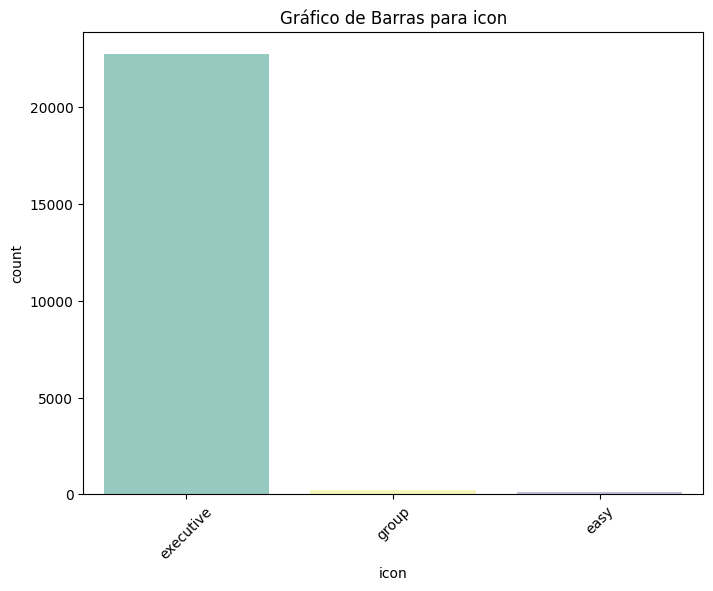

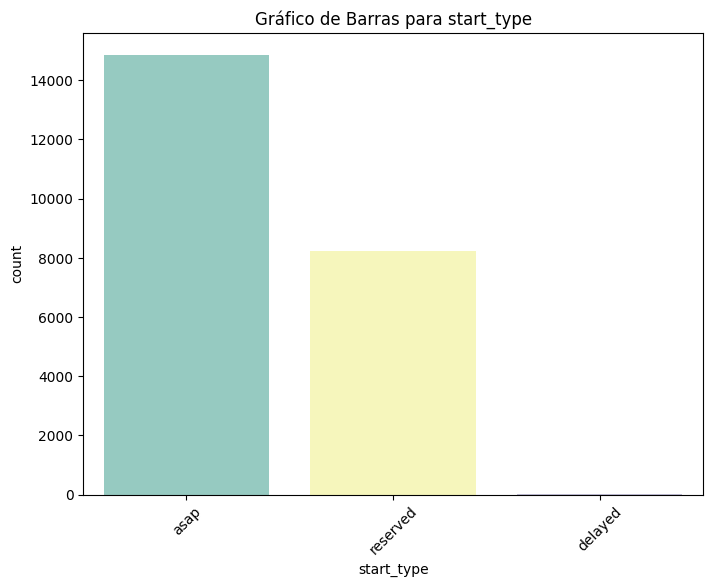

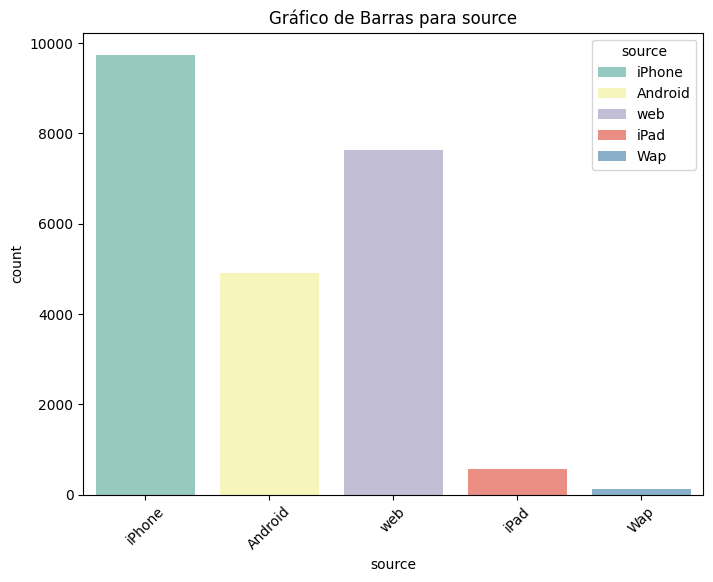

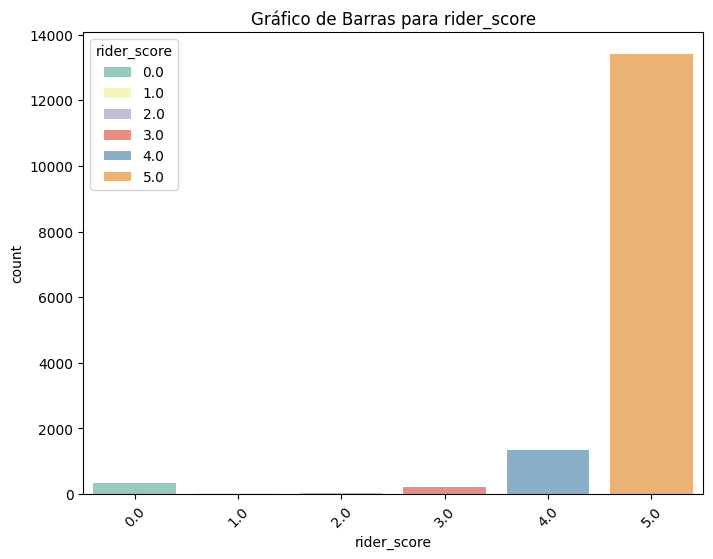

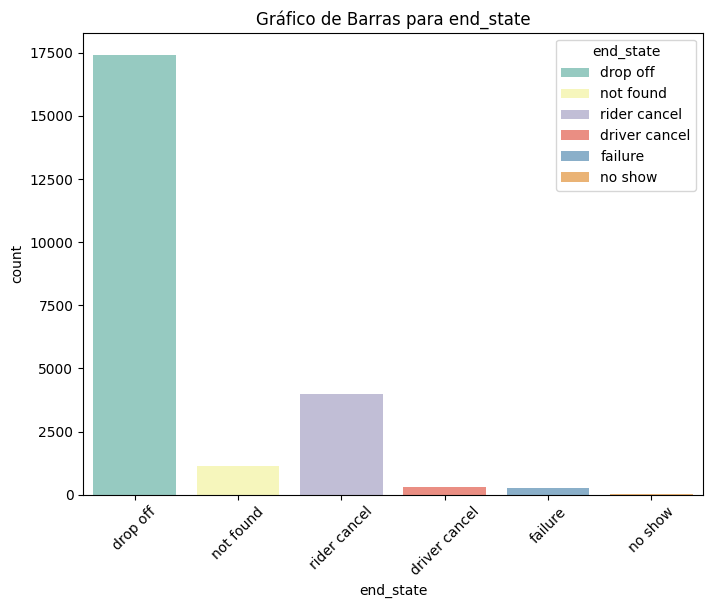

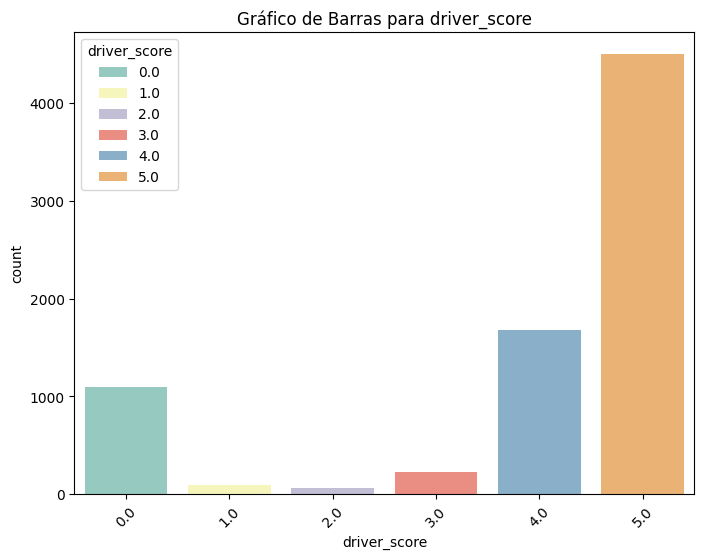

In [ ]:
# Generar un gráfico de barras para cada variable categórica
for columna in var_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=columna,hue=columna, palette="Set3")  # Puedes cambiar la paleta de colores si lo deseas
    plt.title(f'Gráfico de Barras para {columna}')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  currency          23111 non-null  object

3.análisis univariado de las columnas que considere relevante . Incluya los tipos de gráficos que considere apropiados y comente sus resultados

# Variables Numéricas Relevantes:

- **price**: Puede ser relevante para entender los costos asociados a los viajes.
- **distance:** Importante para analizar la relación entre la distancia y el costo o duración del viaje.
- **duration**: Relevante para evaluar la eficiencia del servicio.
- **cost**: Esencial para determinar la rentabilidad del viaje.
# Graficos
Histogramas y Boxplots.

count    22713.000000
mean      2752.738784
std       3025.390309
min          0.000000
25%       1700.000000
50%       1911.000000
75%       3597.000000
max      55974.000000
Name: price, dtype: float64


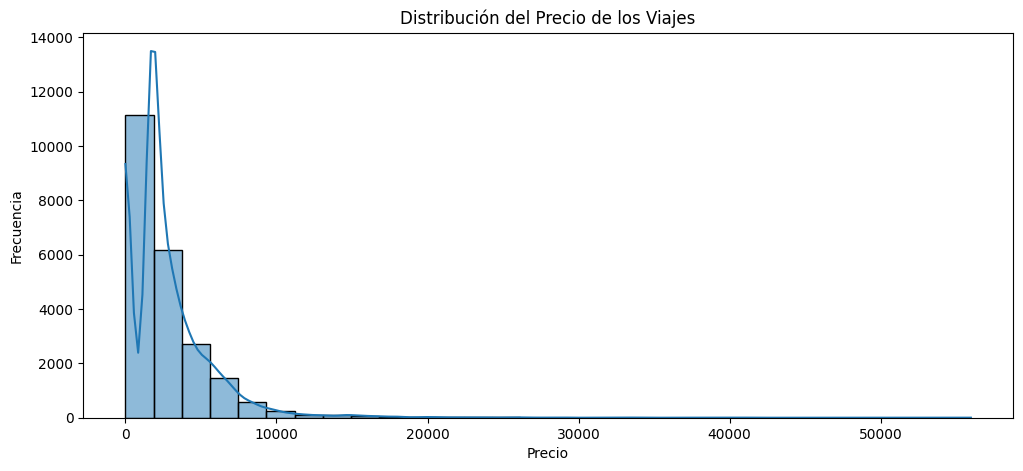

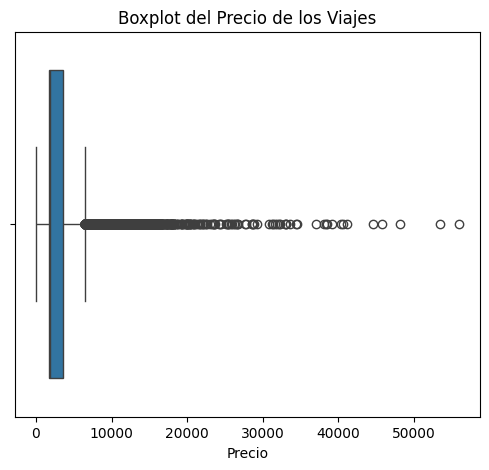

count    2.284800e+04
mean     1.088395e+04
std      2.025735e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.660000e+03
75%      9.290250e+03
max      1.403722e+07
Name: distance, dtype: float64


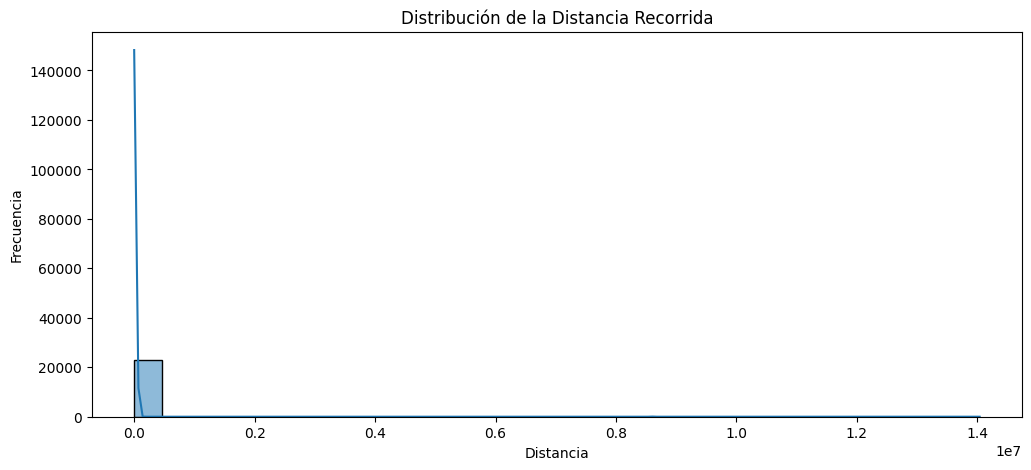

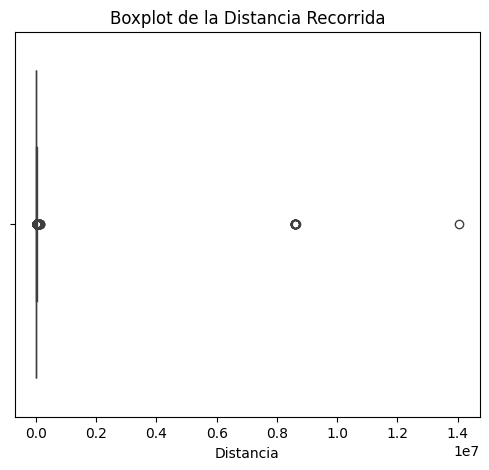

count    22848.000000
mean       638.831145
std       1788.661444
min          0.000000
25%          0.000000
50%        218.000000
75%        667.000000
max      83807.000000
Name: duration, dtype: float64


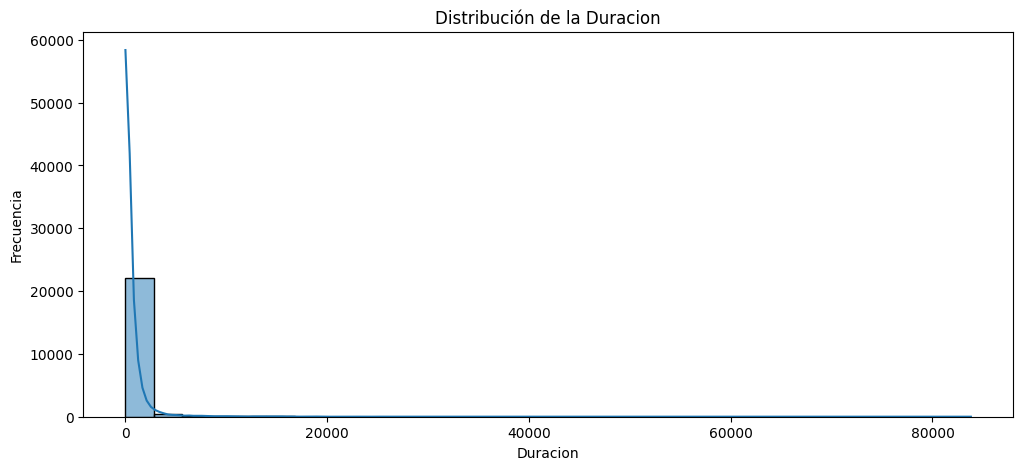

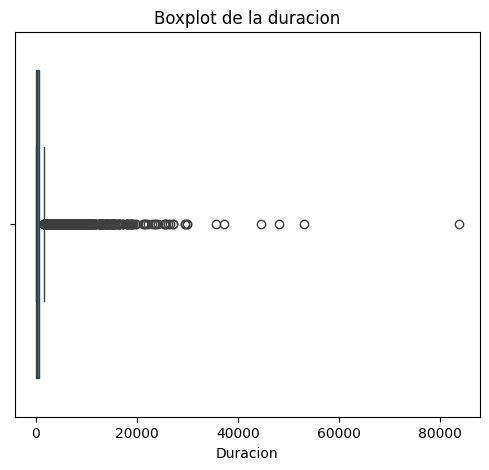

count     21760.000000
mean       2655.032445
std       17124.801935
min           0.000000
25%           0.000000
50%        1450.000000
75%        2381.250000
max      525000.000000
Name: cost, dtype: float64


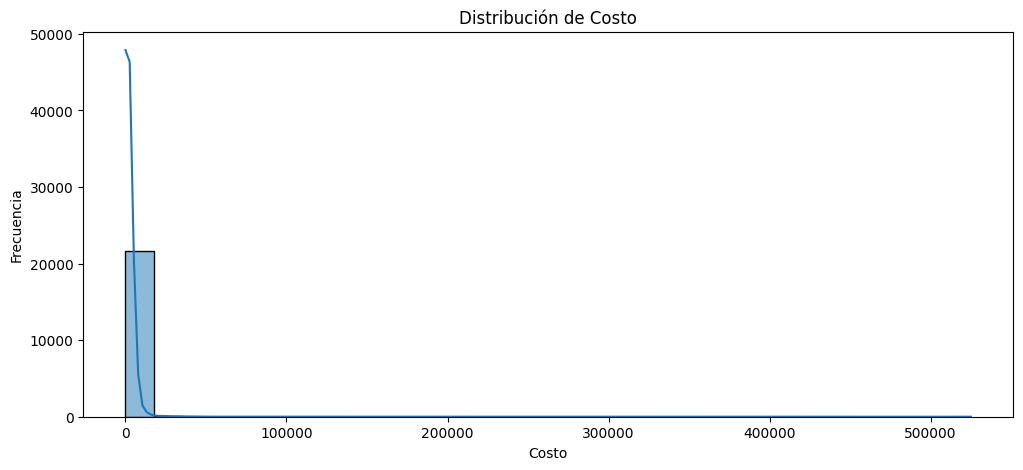

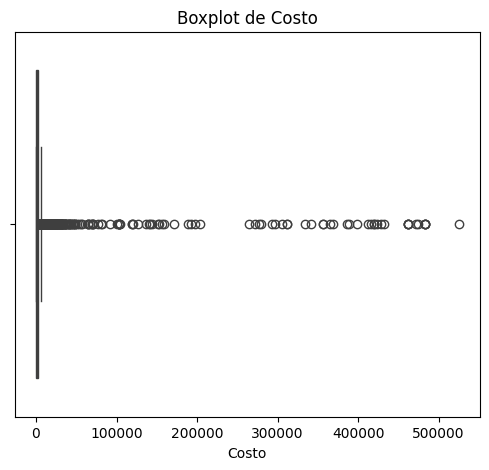

In [ ]:
print(data['price'].describe())
plt.figure(figsize=(12, 5))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribución del Precio de los Viajes')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=data['price'])
plt.title('Boxplot del Precio de los Viajes')
plt.xlabel('Precio')
plt.show()

print(data['distance'].describe())
plt.figure(figsize=(12, 5))
sns.histplot(data['distance'], kde=True, bins=30)
plt.title('Distribución de la Distancia Recorrida')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=data['distance'])
plt.title('Boxplot de la Distancia Recorrida')
plt.xlabel('Distancia')
plt.show()

print(data['duration'].describe())
plt.figure(figsize=(12, 5))
sns.histplot(data['duration'], kde=True, bins=30)
plt.title('Distribución de la Duracion')
plt.xlabel('Duracion')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=data['duration'])
plt.title('Boxplot de la duracion')
plt.xlabel('Duracion')
plt.show()

print(data['cost'].describe())
plt.figure(figsize=(12, 5))
sns.histplot(data['cost'], kde=True, bins=30)
plt.title('Distribución de Costo')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=data['cost'])
plt.title('Boxplot de Costo')
plt.xlabel('Costo')
plt.show()

- El análisis del precio muestra que hay 22,713 registros, con un promedio de 2752.74 y una mediana de 1911.00, lo que indica una distribución sesgada hacia la derecha. La alta desviación estándar de 3025.39 sugiere una amplia variabilidad en los precios, con un mínimo de 0 (posiblemente indicando viajes gratuitos o datos faltantes) y un máximo de 55,974, lo que podría ser un valor atípico. Los cuartiles revelan que el 25% de los viajes tienen precios por debajo de 1700, mientras que el 75% están por debajo de 3597. Estos hallazgos indican la necesidad de investigar más a fondo los valores atípicos y los viajes con precios nulos.

- El análisis de la columna distance revela un total de 22,848 registros, con un promedio de 10,883.95 y una mediana de 4,660.00, lo que indica una distribución sesgada hacia la derecha. La desviación estándar de 202,573.50 sugiere una alta variabilidad, reflejando que las distancias de los viajes son muy dispares. El mínimo de 0 (que podría señalar viajes sin desplazamiento o datos faltantes) y un máximo de 14,037,220 indican la presencia de valores atípicos extremos. Además, el 25% de los viajes tienen distancias de 0, lo que implica que un cuarto de los registros no reportan desplazamiento, mientras que el 75% está por debajo de 9,290.25. Estos resultados subrayan la necesidad de investigar los viajes con distancias nulas y los posibles valores extremos para comprender mejor la naturaleza de los datos.

- El análisis de la columna duration revela un total de 22,848 registros, con un promedio de 638.83 y una mediana de 218.00, lo que indica una distribución sesgada hacia la derecha. La desviación estándar de 1,788.66 sugiere una alta variabilidad en las duraciones de los viajes, con un mínimo de 0 (posiblemente indicando viajes sin tiempo registrado o datos faltantes) y un máximo de 83,807, lo que podría ser un valor atípico considerable. Además, el 25% de las duraciones son 0, indicando que un cuarto de los registros no reportan tiempo, mientras que el 75% de las duraciones se encuentran por debajo de 667.00. Estos resultados subrayan la necesidad de investigar los registros con duraciones nulas y los valores extremos para entender mejor la naturaleza de los datos de duración de los viajes.

- El análisis de la columna cost muestra un total de 21,760 registros, con un promedio de 2,655.03 y una mediana de 1,450.00, lo que sugiere una distribución sesgada hacia la derecha. La desviación estándar de 17,124.80 indica una gran variabilidad en los costos, con un mínimo de 0 (posiblemente indicando viajes sin costo o datos faltantes) y un máximo de 525,000, que podría ser un valor atípico significativo. Además, el 25% de los costos son 0, lo que implica que un cuarto de los registros no reportan gastos, mientras que el 75% de los costos se encuentran por debajo de 2,381.25. Estos hallazgos resaltan la necesidad de investigar más a fondo los registros con costos nulos y los valores extremos para comprender mejor la distribución de los costos asociados a los viajes.

# Variables Categóricas  Relevantes:

- **rider_score**: Puede indicar la satisfacción del usuario y es relevante para la calidad del servicio.
- **driver_score**: Muestra la percepción de los conductores y también puede ser un indicador de calidad.
- **start_type**: Dependiendo de la naturaleza de los viajes, podría ser relevante para entender el tipo de inicio del viaje (por ejemplo, si es un viaje solicitado o un servicio recurrente).
- **end_state**: Puede ser importante para entender el resultado del viaje (por ejemplo, si fue completado, cancelado, etc.).

# Graficos

Gráficos de barras

rider_score
5.0    13404
4.0     1359
0.0      352
3.0      213
1.0       32
2.0       30
Name: count, dtype: int64


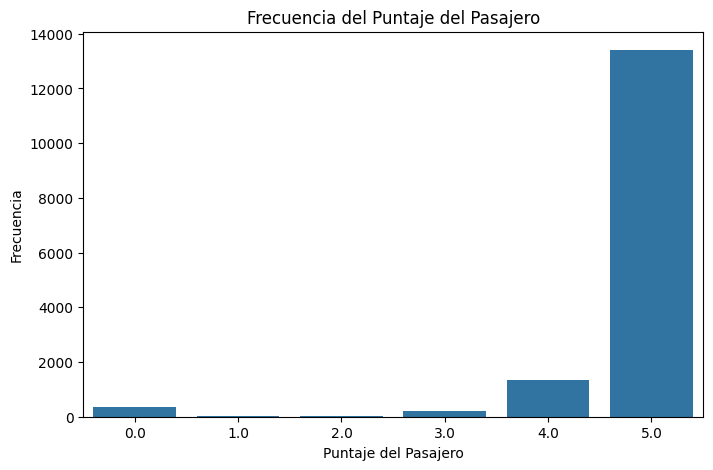

driver_score
5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: count, dtype: int64


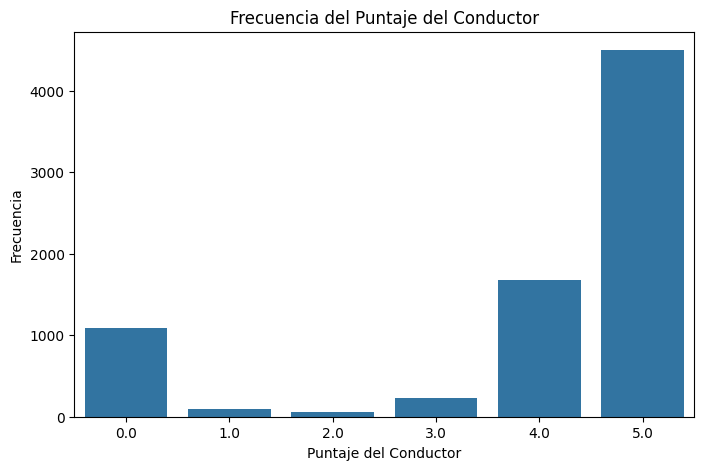

start_type
asap        14865
reserved     8226
delayed        20
Name: count, dtype: int64


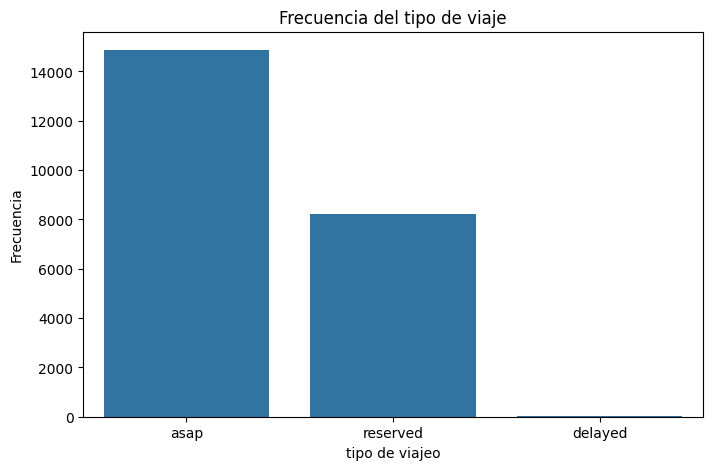

end_state
drop off         17417
rider cancel      3976
not found         1145
driver cancel      292
failure            249
no show             20
Name: count, dtype: int64


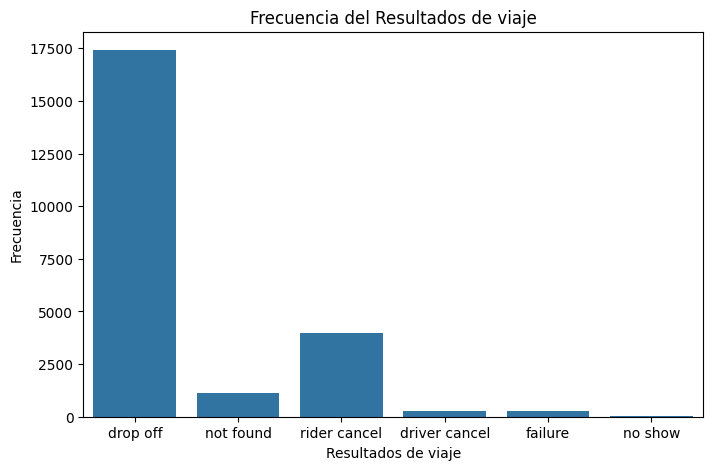

In [ ]:
print(data['rider_score'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x=data['rider_score'])
plt.title('Frecuencia del Puntaje del Pasajero')
plt.xlabel('Puntaje del Pasajero')
plt.ylabel('Frecuencia')
plt.show()

print(data['driver_score'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x=data['driver_score'])
plt.title('Frecuencia del Puntaje del Conductor')
plt.xlabel('Puntaje del Conductor')
plt.ylabel('Frecuencia')
plt.show()

print(data['start_type'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x=data['start_type'])
plt.title('Frecuencia del tipo de viaje')
plt.xlabel('tipo de viajeo')
plt.ylabel('Frecuencia')
plt.show()

print(data['end_state'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x=data['end_state'])
plt.title('Frecuencia del Resultados de viaje')
plt.xlabel('Resultados de viaje')
plt.ylabel('Frecuencia')
plt.show()

- La mayoría de las puntuaciones son 5.0, lo que indica una tendencia general hacia una alta satisfacción por parte de los pasajeros, representando aproximadamente el 58.7% del total de registros. Sin embargo, también hay una cantidad significativa de puntuaciones 0.0, que podrían representar experiencias negativas o datos faltantes, lo que requiere atención. Las puntuaciones más bajas (1.0 y 2.0) son relativamente raras, lo que sugiere que las experiencias negativas son menos comunes. En general, los datos sugieren que la mayoría de los pasajeros están satisfechos con el servicio, aunque es importante investigar la razón detrás de las puntuaciones bajas y los ceros para comprender mejor las áreas que pueden necesitar mejoras.
- Al igual que en el caso de las puntuaciones de los pasajeros, la mayoría de las puntuaciones son 5.0, lo que indica una satisfacción notable hacia el desempeño de los conductores, representando aproximadamente el 20.6% del total de registros. Sin embargo, la presencia de puntuaciones 0.0 (que podrían reflejar experiencias negativas o datos faltantes) es significativa, representando alrededor del 10.1% del total. Las puntuaciones más bajas (1.0 y 2.0) son menos frecuentes, lo que sugiere que las evaluaciones muy negativas son raras. En general, aunque la mayoría de los conductores reciben buenas calificaciones, es esencial investigar las razones detrás de las puntuaciones bajas y los ceros para identificar áreas de mejora y asegurar una calidad constante en el servicio.
- La categoría asap es la más común, representando aproximadamente el 64.9% del total de registros, lo que indica que la mayoría de los pasajeros prefieren iniciar sus viajes de inmediato. La opción reserved es también significativa, con 8,226 registros, lo que representa alrededor del 35.1% del total. Sin embargo, la categoría delayed tiene una presencia muy baja, con solo 20 registros, lo que sugiere que esta opción es poco utilizada o que los retrasos son inusuales en la práctica. En general, los datos reflejan una clara preferencia por los inicios inmediatos, lo que podría influir en la planificación de recursos y operaciones por parte de la compañía de taxis.
- La categoría drop off es la más frecuente, representando aproximadamente el 76.6% del total de registros, lo que indica que la mayoría de los viajes concluyen exitosamente con el pasajero siendo dejado en su destino. La segunda categoría más común es rider cancel, con 3,976 registros, que representa alrededor del 17.5%. Esto sugiere que una proporción significativa de pasajeros cancela sus viajes después de haberlos solicitado. Las categorías not found, driver cancel, failure y no show son menos frecuentes, siendo especialmente raras las situaciones de no show con solo 20 registros. En general, aunque la mayoría de los viajes terminan exitosamente, la cantidad de cancelaciones por parte de los pasajeros indica un área que podría ser objeto de análisis adicional para comprender las razones detrás de las cancelaciones.

El campo **start_at** es object, sin emabrgo indica la fecha y hora donde fue tomado el taxi. Podemos convertir a tipo de dato datetime de pandas usando:

In [ ]:
data['start_at'] = pd.to_datetime(data['start_at'], format="%d/%m/%Y %H:%M")

In [ ]:
data.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

             end_at       end_lat       end_lon  end_state driver_start_lat  \
0  16/11/2010 17:29  -12,05537033   -77,0413208   drop off     -12,10825481   
1   01/06/2010 0:37  -12,12465668  -77,02886963  not found              NaN   
2   31/05/2010 5:04  -12,13883209  -76,99530029  not found              NaN   
3   01/06/2010 0:32  -12,12458801  -77,02896118  not found              NaN   
4   12/09/2010 1:07  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon        arrived_at currency   price  price_distance  \
0      -77,0272739  16/11/2010 17:02      PEN  3821.0          3626.0   
1              NaN               NaN      PEN     0.0             NaN   
2              NaN               NaN      PEN     0.0             NaN   
3              NaN               NaN      PEN     0.0             NaN   
4      -76,9277072  11/09/2010 23:50      PEN  8227.0          7665.0   

   price_duration  distance  duration    cost  cost_distance  cost_duration  \
0           195.0   11331.0     234.0     0.0            0.0            0.0   
1             NaN       0.0       0.0     0.0            NaN            NaN   
2             NaN       0.0       0.0     0.0            NaN            NaN   
3             NaN       0.0       0.0     0.0            NaN            NaN   
4           562.0   30270.0     715.0  6173.0         5756.0          417.0   

   source  driver_score  rider_score  
0  iPhone           5.0          5.0  
1  iPhone           NaN          NaN  
2  iPhone           NaN          NaN  
3  iPhone           NaN          NaN  
4  iPhone           4.0          5.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  object        
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

Podemos crear distintos atributos usando el campo start_at:

In [ ]:
data['mes'] = data['start_at'].dt.month
data['year'] = data['start_at'].dt.year
data['date'] = data['start_at'].dt.date
data['hour'] = data['start_at'].dt.hour

data['MonthDayNum'] = data['start_at'].dt.day
data['DayOfWeek'] = data['start_at'].dt.day_name()
data['DayOfWeek_i'] = data['start_at'].dt.weekday

In [ ]:
data

journey_id                           user_id  \
0      23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1      dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2      dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3      dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4      85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   
...                                 ...                               ...   
23106  4a18ea5737ce0ffecaf20b305a0e2c86  8998bb370b5f0cec43a373adebba0c72   
23107  f1e4317f2c17991dd90d1cd17ae0d399  5f8a6ffef0ea5df78a8ee890267b60ec   
23108  1e44c0fd0a266c3719ff30410b257bce  c0ffb6f6cd801004dd8609c12277c2d1   
23109  7073883383b89ad289e864022150cdd7  c0ffb6f6cd801004dd8609c12277c2d1   
23110  b7dea45c3cc92b9efd5a4905e69ff9bf  c0ffb6f6cd801004dd8609c12277c2d1   

                              driver_id                           taxi_id  \
0      583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4      d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   
...                                 ...                               ...   
23106  d665fb9f75ef5d9cd0fd89479380ba78  16cbe35db7fff70fbc8251b4cda9fdc9   
23107  17c21284245ff240c7212732991c2373  716a697375634f32a06d692b0448f13d   
23108  4851ee4c867c9b49b909c1adb76c31e9  4851ee4c867c9b49b909c1adb76c538e   
23109  56f59b58bcbbd1cdabc3652e713134c2  924d4f0e7554566623e8ebb3904a7b0c   
23110  924d4f0e7554566623e8ebb390491d08  924d4f0e7554566623e8ebb390491492   

            icon start_type            start_at     start_lat     start_lon  \
0      executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1      executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2      executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3      executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4      executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   
...          ...        ...                 ...           ...           ...   
23106  executive   reserved 2010-07-31 13:15:00  -12,08974075  -77,04699707   
23107  executive       asap 2010-10-02 05:26:00  -12,09253011  -77,02875271   
23108  executive       asap 2010-09-21 09:56:00   -12,1275637  -77,02642288   
23109  executive   reserved 2010-04-29 04:30:00    -12,019468   -77,1077669   
23110  executive       asap 2010-03-16 19:58:00   -12,1334974   -77,0272581   

                 end_at       end_lat       end_lon     end_state  \
0      16/11/2010 17:29  -12,05537033   -77,0413208      drop off   
1       01/06/2010 0:37  -12,12465668  -77,02886963     not found   
2       31/05/2010 5:04  -12,13883209  -76,99530029     not found   
3       01/06/2010 0:32  -12,12458801  -77,02896118     not found   
4       12/09/2010 1:07  -12,02223206  -77,10638428      drop off   
...                 ...           ...           ...           ...   
23106  31/07/2010 13:27  -12,08352661  -77,05044556      drop off   
23107   02/10/2010 5:56  -12,07776001  -77,05623798      drop off   
23108  21/09/2010 10:18  -12,10529838  -77,04735249      drop off   
23109   29/04/2010 5:11  -12,09909987  -77,03475013      drop off   
23110  16/03/2010 20:02    -12,029174     -76,93977  rider cancel   

      driver_start_lat driver_start_lon        arrived_at currency   price  \
0         -12,10825481      -77,0272739  16/11/2010 17:02      PEN  3821.0   
1                  NaN              NaN               NaN      PEN     0.0   
2                  NaN              NaN               NaN      PEN     0.0   
3                  NaN              NaN               NaN      PEN     0.0   
4         -

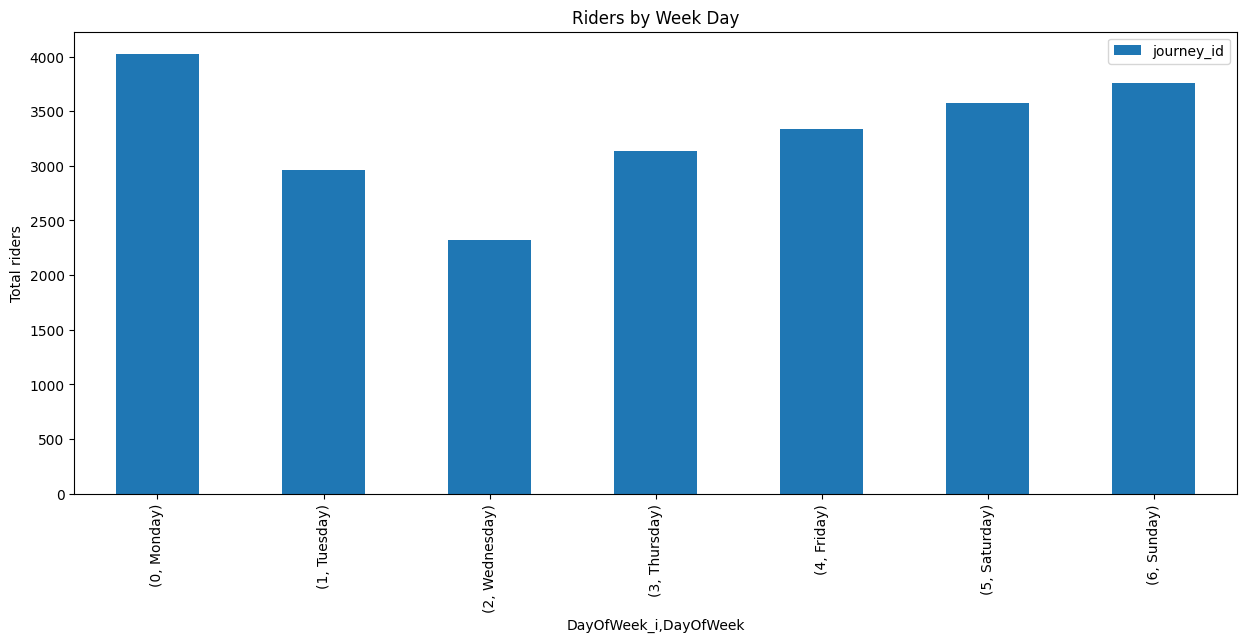

In [ ]:
# Visualicemos la cantidad total de viajes por día de semana.
uber2010_weekdays = data.pivot_table(index=['DayOfWeek_i','DayOfWeek'],
                                  values='journey_id',
                                  aggfunc='count')
uber2010_weekdays.plot(kind='bar', figsize=(15,6))
plt.ylabel('Total riders')
#plt.set_xticklabels(x_labels)
plt.title('Riders by Week Day');

4. gráficos de barras o líneas para identificar patrones de viajes
- Los viajes son más frecuentes los fines de semana o durante la semana?
- ¿Cómo es la tendencia mes a mes? A qué se debe esto?
- ¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?
- ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

## Los viajes son más frecuentes los fines de semana o durante la semana?

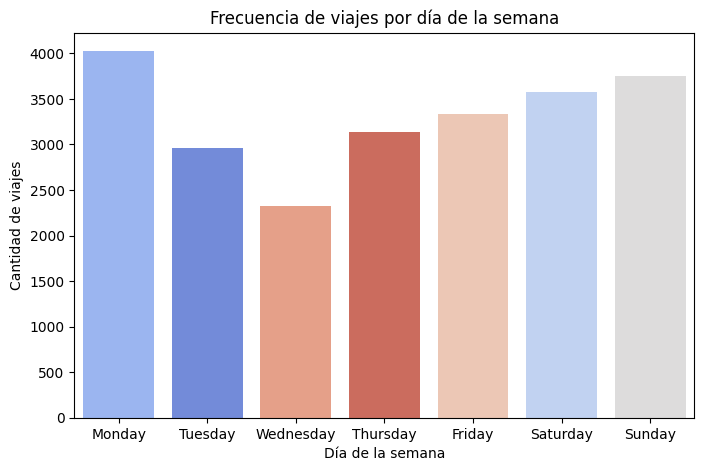

Promedio de viajes durante la semana: 3156.6
Promedio de viajes en los fines de semana: 3664.0


In [ ]:

# 1. Frecuencia de viajes por día de la semana
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='DayOfWeek',
              hue='DayOfWeek',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='coolwarm', legend=False)
plt.title("Frecuencia de viajes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de viajes")
plt.show()

frecuencia_dia_semana = data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Convertir a DataFrame para una mejor visualización
frecuencia_dia_semana_df = frecuencia_dia_semana.reset_index()
frecuencia_dia_semana_df.columns = ['Día de la semana', 'Cantidad de viajes']

# Mostrar la tabla
frecuencia_dia_semana_df

promedio_dias_semana = frecuencia_dia_semana_df['Cantidad de viajes'].iloc[:5].mean()  # Lunes a Viernes
promedio_fines_semana = frecuencia_dia_semana_df['Cantidad de viajes'].iloc[5:].mean()  # Sábado y Domingo

print(f"Promedio de viajes durante la semana: {promedio_dias_semana}")
print(f"Promedio de viajes en los fines de semana: {promedio_fines_semana}")


Segun el grafico, se tiene el lunes como el dia con mayor frecuencia de viajes, seguido del domingo y el sabado. Podriamos concluir que los fines de semana tienen mayor cantidad de viajes respecto a los demas dias de la semana a excepcion del lunes, que es el dia con mayor frecuencia. Pero para una mayor comprension comparamos la media de cada grupo de dias. teniendo:
- Promedio de viajes durante la semana: 3156.6
- Promedio de viajes en los fines de semana: 3664.0

por ende los fines de semana hay una mayor razon de viajes por dia.

## ¿Cómo es la tendencia mes a mes? A qué se debe esto?

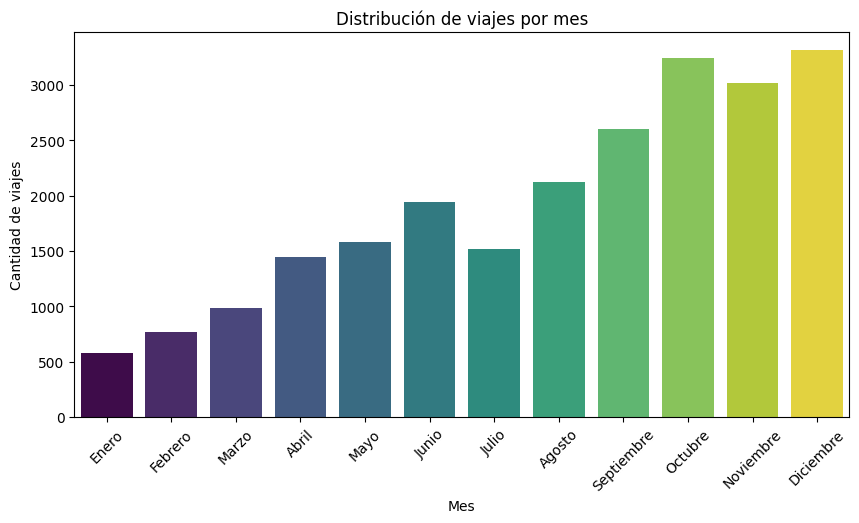

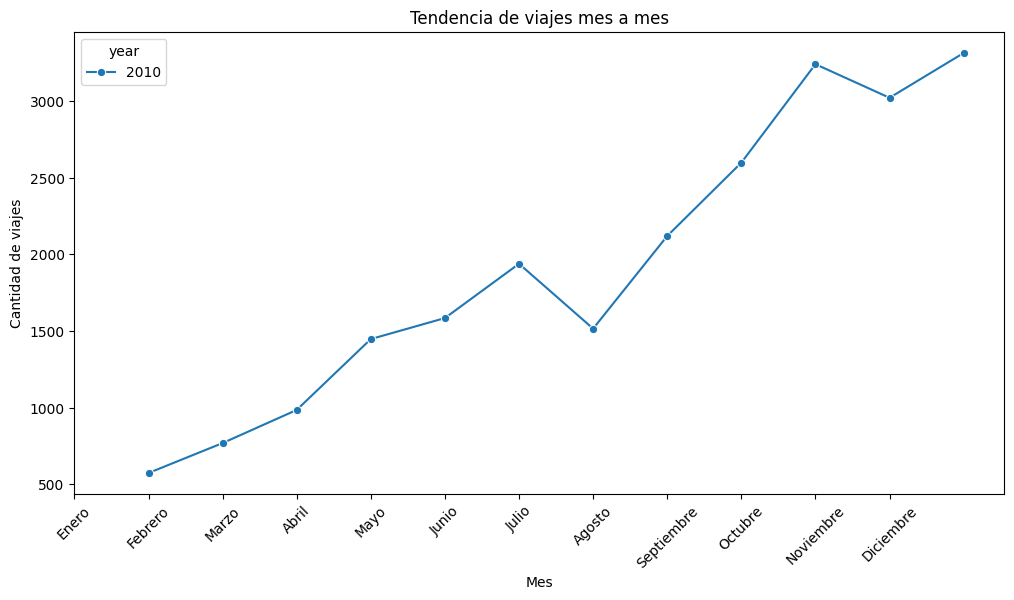

           Mes  Cantidad de viajes
0        Enero                 575
1      Febrero                 770
2        Marzo                 986
3        Abril                1448
4         Mayo                1585
5        Junio                1939
6        Julio                1516
7       Agosto                2120
8   Septiembre                2598
9      Octubre                3240
10   Noviembre                3021
11   Diciembre                3313


In [ ]:
# 2. Distribución de viajes por mes
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='mes',hue='mes', palette='viridis', legend = False)
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
           rotation=45)
plt.title("Distribución de viajes por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de viajes")
plt.show()
monthly_trends = data.groupby(['year', 'mes']).size().reset_index(name='cantidad_viajes')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='mes', y='cantidad_viajes', hue='year', palette='tab10', marker='o')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril',
                                      'Mayo', 'Junio', 'Julio', 'Agosto',
                                      'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
           rotation=45)
plt.title("Tendencia de viajes mes a mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de viajes")
plt.show()
# Calcular la cantidad de viajes por mes
cantidad_viajes_por_mes = data['mes'].value_counts().sort_index()

# Crear un DataFrame para mostrar los resultados en formato tabla
tabla_viajes_por_mes = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    'Cantidad de viajes': cantidad_viajes_por_mes.values
})

# Mostrar la tabla
print(tabla_viajes_por_mes)

La tendencia observada en la cantidad de viajes por mes sugiere un aumento gradual en la actividad a lo largo del año, con picos notables en ciertos meses. Aquí hay algunas posibles explicaciones para esta tendencia:

- Demanda Aumentada Durante Temporadas: Es probable que haya picos de demanda en meses específicos,  cuando las personas tienden a salir más y utilizan estos servicios para evitar el tráfico o no tener que preocuparse por el estacionamiento.

- Promociones y Descuentos: Muchas aplicaciones de transporte ofrecen promociones especiales o descuentos en meses particulares para atraer a más usuarios. Esto podría aumentar la cantidad de viajes en esos meses.

- Eventos Locales: La celebración de festivales, conciertos, ferias y otros eventos puede llevar a un aumento en el uso de servicios de transporte particulares. Los usuarios a menudo prefieren utilizar estos servicios para evitar la congestión de tráfico y la dificultad de encontrar estacionamiento.

- Cambios en Comportamientos Sociales: Las tendencias hacia un mayor uso de servicios de movilidad, especialmente en áreas urbanas, pueden estar influenciadas por la comodidad de las aplicaciones, la seguridad percibida y el deseo de evitar el uso de vehículos particulares.

- Factores Económicos y Sociales: La situación económica puede influir en la disposición de las personas a utilizar servicios de transporte privados. Por ejemplo, un aumento en la economía local podría significar más personas dispuestas a gastar en servicios de transporte.

- Variaciones Climáticas: La temporada de lluvia o el clima extremo en ciertos meses pueden influir en la decisión de las personas de optar por servicios de transporte en lugar de caminar o utilizar transporte público.


##¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?

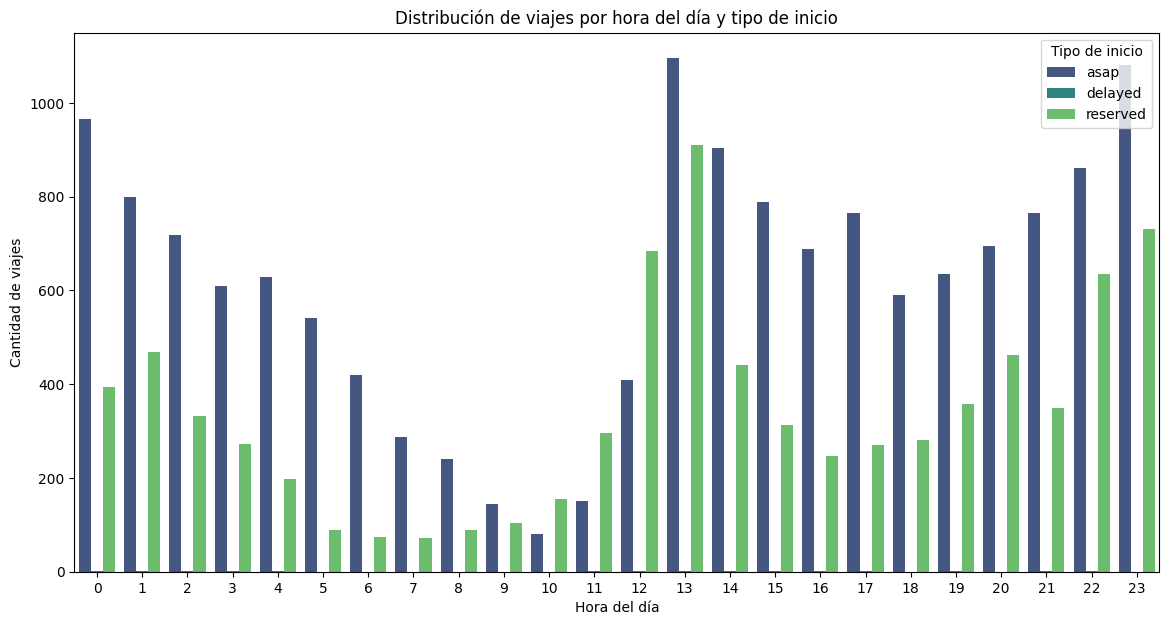

start_type    asap  delayed  reserved
hour                                 
0            966.0      2.0     394.0
1            800.0      2.0     469.0
2            719.0      1.0     332.0
3            609.0      2.0     273.0
4            629.0      2.0     198.0
5            542.0      0.0      88.0
6            419.0      0.0      75.0
7            288.0      0.0      73.0
8            241.0      0.0      90.0
9            144.0      0.0     103.0
10            81.0      0.0     155.0
11           150.0      1.0     296.0
12           410.0      1.0     684.0
13          1095.0      2.0     911.0
14           904.0      1.0     440.0
15           789.0      1.0     313.0
16           688.0      1.0     246.0
17           766.0      1.0     271.0
18           590.0      0.0     281.0
19           635.0      1.0     358.0
20           694.0      0.0     462.0
21           765.0      1.0     349.0
22           861.0      1.0     635.0
23          1080.0      0.0     730.0


In [ ]:
# Agrupar por hora y tipo de viaje
hourly_distribution = data.groupby(['hour', 'start_type']).size().reset_index(name='cantidad_viajes')

plt.figure(figsize=(14, 7))
sns.barplot(data=hourly_distribution, x='hour', y='cantidad_viajes', hue='start_type', palette='viridis')
plt.title("Distribución de viajes por hora del día y tipo de inicio")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de viajes")
plt.xticks(range(24))  # Mostrar todas las horas
plt.legend(title='Tipo de inicio')
plt.show()

# Agrupamos los datos por hora y tipo de inicio, y contamos la cantidad de viajes
hourly_distribution = data.groupby(['hour', 'start_type']).size().reset_index(name='cantidad_viajes')

# Pivotamos la tabla para tener las horas como filas y los tipos de inicio como columnas
hourly_distribution_pivot = hourly_distribution.pivot(index='hour', columns='start_type', values='cantidad_viajes').fillna(0)

# Mostramos la tabla
print(hourly_distribution_pivot)


La tabla muestra la distribución de viajes por hora del día, categorizados según el tipo de inicio: "asap," "delayed," y "reserved." Se observa que el tipo "asap" predomina en la mayoría de las horas, alcanzando su punto máximo a las 13:00 con 1,095 viajes, lo que sugiere una alta demanda de servicios inmediatos durante el día. En contraste, el tipo "delayed" tiene una cantidad significativamente menor de viajes, con un máximo de solo 2 viajes en varias horas, lo que indica que este tipo de solicitud es poco común. Por otro lado, "reserved" muestra un comportamiento intermedio, con picos notables en horas como las 12:00 (684 viajes) y 13:00 (911 viajes), lo que podría indicar que los usuarios prefieren planificar sus viajes para el almuerzo. Esto sugiere que la mayoría de los usuarios buscan soluciones rápidas, mientras que hay un interés moderado en la reserva anticipada.

## ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

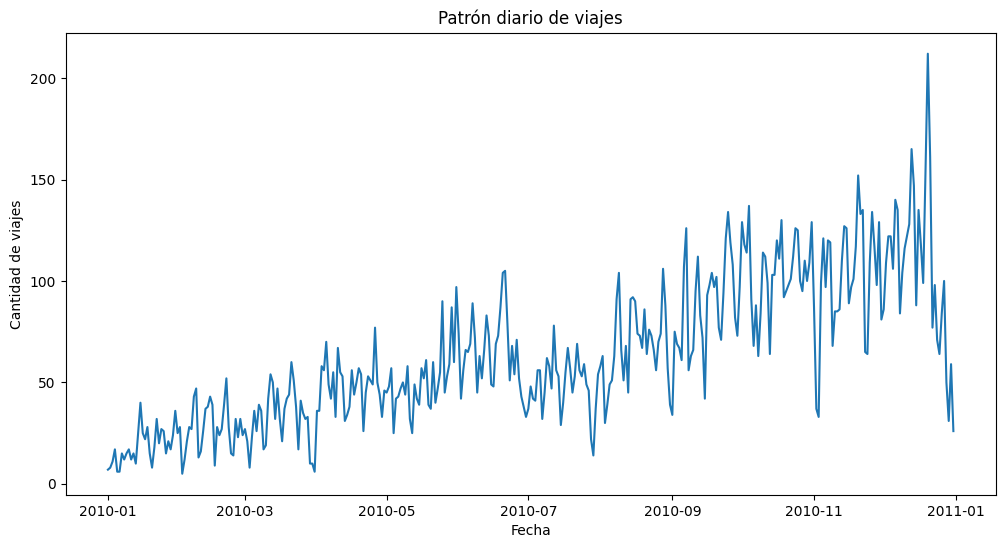

<ipython-input-55-6409391ec910>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='MonthDayNum', palette='muted')


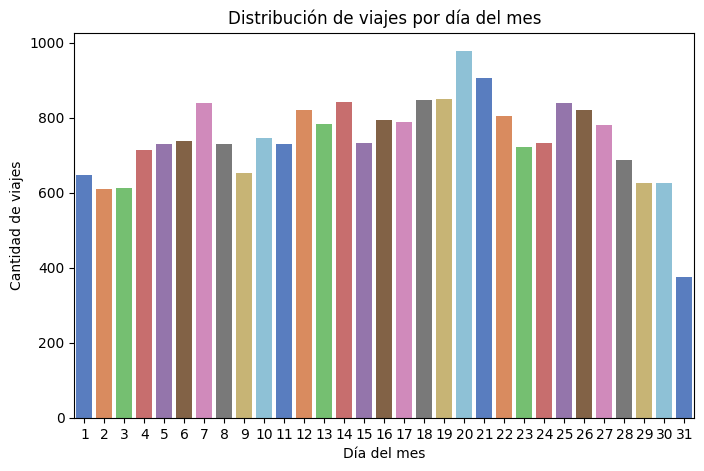

    Día del mes  Cantidad de viajes
0             1                 648
1             2                 610
2             3                 612
3             4                 713
4             5                 731
5             6                 739
6             7                 839
7             8                 730
8             9                 652
9            10                 745
10           11                 731
11           12                 821
12           13                 784
13           14                 842
14           15                 732
15           16                 794
16           17                 789
17           18                 847
18           19                 851
19           20                 978
20           21                 907
21           22                 804
22           23                 722
23           24                 733
24           25                 839
25           26                 822
26           27             

In [ ]:
# 4. Tendencia diaria de viajes
viajes_diarios = data.groupby('date').size().reset_index(name='cantidad_viajes')

plt.figure(figsize=(12, 6))
sns.lineplot(data=viajes_diarios, x='date', y='cantidad_viajes')
plt.title("Patrón diario de viajes")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de viajes")
plt.show()

# 5. Distribución de viajes por día del mes
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='MonthDayNum', palette='muted')
plt.title("Distribución de viajes por día del mes")
plt.xlabel("Día del mes")
plt.ylabel("Cantidad de viajes")
plt.show()
# Agrupar los datos por el día del mes y contar la cantidad de viajes
daily_distribution = data['MonthDayNum'].value_counts().sort_index().reset_index()
daily_distribution.columns = ['Día del mes', 'Cantidad de viajes']

# Mostrar la tabla
print(daily_distribution)


La distribución de viajes por día del mes revela varios patrones y tendencias interesantes:

- **Tendencia General Ascendente**: A lo largo del mes, se observa una tendencia general creciente en la cantidad de viajes, especialmente entre los días 1 y 20. Esto puede indicar un aumento en la demanda de servicios de viaje, posiblemente asociado a la acumulación de actividades o eventos programados hacia el final del mes.

- **Pico en la Parte Media del Mes**: Hay un notable pico de viajes el día 20, lo que sugiere que ese día pudo haber ocurrido un evento o actividad significativa que impulsó la demanda. Los días previos y posteriores también muestran cifras altas, lo que puede indicar un patrón de reserva anticipada o viajes relacionados con eventos cercanos.

- **Descenso al Final del Mes**: A partir del día 25, se observa una disminución progresiva en la cantidad de viajes, con el día 31 mostrando la menor cantidad de viajes. Esto podría ser indicativo de una reducción en la demanda de servicios de viaje al final del mes, quizás relacionado con el ciclo mensual de ingresos o gasto de los consumidores.

- **Estabilidad en los Días Centrales**: Los días intermedios (del 11 al 20) mantienen cantidades relativamente estables de viajes, lo que puede sugerir un patrón habitual de uso de servicios de transporte durante estos días, en contraste con los extremos del mes.

- **Variaciones Mínimas**: La cantidad de viajes muestra variaciones mínimas en algunos días, lo que sugiere que hay una base constante de demanda, independientemente de los eventos específicos.

<Axes: xlabel='date'>

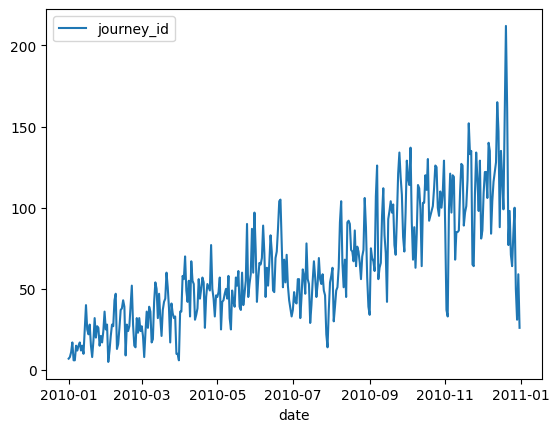

In [ ]:
data.groupby('date').agg({'journey_id':'count'}).plot()

## Análisis Geo Espacial

In [ ]:
import geopandas as gpd

In [ ]:
# Convertimos nuestro dataframe a un GeoDataframe en pandas
data.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

             end_at       end_lat       end_lon  end_state driver_start_lat  \
0  16/11/2010 17:29  -12,05537033   -77,0413208   drop off     -12,10825481   
1   01/06/2010 0:37  -12,12465668  -77,02886963  not found              NaN   
2   31/05/2010 5:04  -12,13883209  -76,99530029  not found              NaN   
3   01/06/2010 0:32  -12,12458801  -77,02896118  not found              NaN   
4   12/09/2010 1:07  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon        arrived_at currency   price  price_distance  \
0      -77,0272739  16/11/2010 17:02      PEN  3821.0          3626.0   
1              NaN               NaN      PEN     0.0             NaN   
2              NaN               NaN      PEN     0.0             NaN   
3              NaN               NaN      PEN     0.0             NaN   
4      -76,9277072  11/09/2010 23:50      PEN  8227.0          7665.0   

   price_duration  distance  duration    cost  cost_distance  cost_duration  \
0           195.0   11331.0     234.0     0.0            0.0            0.0   
1             NaN       0.0       0.0     0.0            NaN            NaN   
2             NaN       0.0       0.0     0.0            NaN            NaN   
3             NaN       0.0       0.0     0.0            NaN            NaN   
4           562.0   30270.0     715.0  6173.0         5756.0          417.0   

   source  driver_score  rider_score  mes  year        date  hour  \
0  iPhone           5.0          5.0   11  2010  2010-11-16    16   
1  iPhone           NaN          NaN    6  2010  2010-06-01     0   
2  iPhone           NaN          NaN    5  2010  2010-05-31     5   
3  iPhone           NaN          NaN    6  2010  2010-06-01     0   
4  iPhone           4.0          5.0    9  2010  2010-09-11    23   

   MonthDayNum DayOfWeek  DayOfWeek_i  
0           16   Tuesday            1  
1            1   Tuesday            1  
2           31    Monday            0  
3            1   Tuesday            1  
4           11  Saturday            5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  object        
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [ ]:
# Tomaremos como referencia la ubicación en donde fue tomado el taxi: start_lat , start_lon. Antes debemos convertir a número
data[['start_lat','start_lon']]

start_lat     start_lon
0      -12,13983536  -77,02355957
1      -12,13874817  -76,99536133
2      -12,12453079  -77,02780151
3      -12,13885117  -76,99530029
4      -12,08995438  -76,92626953
...             ...           ...
23106  -12,08974075  -77,04699707
23107  -12,09253011  -77,02875271
23108   -12,1275637  -77,02642288
23109    -12,019468   -77,1077669
23110   -12,1334974   -77,0272581

[23111 rows x 2 columns]

In [ ]:
data[['start_lat','start_lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   start_lat  23111 non-null  object
 1   start_lon  23111 non-null  object
dtypes: object(2)
memory usage: 361.2+ KB


In [ ]:
data['latitude'] = data['start_lat'].str.replace(',','.')
data['longitude'] = data['start_lon'].str.replace(',','.')

In [ ]:
data['latitude'] = data['latitude'].astype('float')
data['longitude'] = data['longitude'].astype('float')

In [ ]:
data[['latitude','longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   23111 non-null  float64
 1   longitude  23111 non-null  float64
dtypes: float64(2)
memory usage: 361.2 KB


In [ ]:
data_geo = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326"
)

In [ ]:
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Leemos información de los distritos
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

In [ ]:
lima_dis.head()

id departamento provincia     distrito institucion  distrito2  \
0   2         LIMA      LIMA    SAN BORJA         IGN  San Borja   
1   6         LIMA      LIMA  JESUS MARIA         IGN       None   
2   7         LIMA      LIMA   PACHACAMAC         IGN       None   
3  10         LIMA      LIMA     SAN LUIS         IGN       None   
4  12         LIMA      LIMA    LA MOLINA         IGN       None   

                                            geometry  
0  MULTIPOLYGON (((-76.98588 -12.08173, -76.98585...  
1  MULTIPOLYGON (((-77.04242 -12.08297, -77.04311...  
2  MULTIPOLYGON (((-76.87588 -12.0735, -76.87582 ...  
3  MULTIPOLYGON (((-76.9978 -12.06084, -76.9981 -...  
4  MULTIPOLYGON (((-76.94139 -12.06207, -76.94137...

In [ ]:
# Join espacial para agregar información de distritos:
data_geo_dis = data_geo.sjoin(lima_dis[['provincia','distrito','geometry']])

In [ ]:
data_geo_dis

journey_id                           user_id  \
0      23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1      dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2      dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3      dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4      85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   
...                                 ...                               ...   
23106  4a18ea5737ce0ffecaf20b305a0e2c86  8998bb370b5f0cec43a373adebba0c72   
23107  f1e4317f2c17991dd90d1cd17ae0d399  5f8a6ffef0ea5df78a8ee890267b60ec   
23108  1e44c0fd0a266c3719ff30410b257bce  c0ffb6f6cd801004dd8609c12277c2d1   
23109  7073883383b89ad289e864022150cdd7  c0ffb6f6cd801004dd8609c12277c2d1   
23110  b7dea45c3cc92b9efd5a4905e69ff9bf  c0ffb6f6cd801004dd8609c12277c2d1   

                              driver_id                           taxi_id  \
0      583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4      d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   
...                                 ...                               ...   
23106  d665fb9f75ef5d9cd0fd89479380ba78  16cbe35db7fff70fbc8251b4cda9fdc9   
23107  17c21284245ff240c7212732991c2373  716a697375634f32a06d692b0448f13d   
23108  4851ee4c867c9b49b909c1adb76c31e9  4851ee4c867c9b49b909c1adb76c538e   
23109  56f59b58bcbbd1cdabc3652e713134c2  924d4f0e7554566623e8ebb3904a7b0c   
23110  924d4f0e7554566623e8ebb390491d08  924d4f0e7554566623e8ebb390491492   

            icon start_type            start_at     start_lat     start_lon  \
0      executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1      executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2      executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3      executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4      executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   
...          ...        ...                 ...           ...           ...   
23106  executive   reserved 2010-07-31 13:15:00  -12,08974075  -77,04699707   
23107  executive       asap 2010-10-02 05:26:00  -12,09253011  -77,02875271   
23108  executive       asap 2010-09-21 09:56:00   -12,1275637  -77,02642288   
23109  executive   reserved 2010-04-29 04:30:00    -12,019468   -77,1077669   
23110  executive       asap 2010-03-16 19:58:00   -12,1334974   -77,0272581   

                 end_at       end_lat       end_lon     end_state  \
0      16/11/2010 17:29  -12,05537033   -77,0413208      drop off   
1       01/06/2010 0:37  -12,12465668  -77,02886963     not found   
2       31/05/2010 5:04  -12,13883209  -76,99530029     not found   
3       01/06/2010 0:32  -12,12458801  -77,02896118     not found   
4       12/09/2010 1:07  -12,02223206  -77,10638428      drop off   
...                 ...           ...           ...           ...   
23106  31/07/2010 13:27  -12,08352661  -77,05044556      drop off   
23107   02/10/2010 5:56  -12,07776001  -77,05623798      drop off   
23108  21/09/2010 10:18  -12,10529838  -77,04735249      drop off   
23109   29/04/2010 5:11  -12,09909987  -77,03475013      drop off   
23110  16/03/2010 20:02    -12,029174     -76,93977  rider cancel   

      driver_start_lat driver_start_lon        arrived_at currency   price  \
0         -12,10825481      -77,0272739  16/11/2010 17:02      PEN  3821.0   
1                  NaN              NaN               NaN      PEN     0.0   
2                  NaN              NaN               NaN      PEN     0.0   
3                  NaN              NaN               NaN      PEN     0.0   
4         -

In [ ]:
# Cantidad de viajes por distrito
data_geo_dis.groupby('distrito').agg({'journey_id':'count','price':'mean'}).reset_index().sort_values('journey_id',ascending=False)

distrito  journey_id         price
30                  SAN ISIDRO        5643   2540.388789
38           SANTIAGO DE SURCO        5134   2602.895755
22                  MIRAFLORES        4925   2447.356731
29                   SAN BORJA        1233   3329.310855
39                   SURQUILLO         981   2044.014493
12                   LA MOLINA         911   3384.642377
4                       CALLAO         856   5279.665459
1                     BARRANCO         624   2718.758170
16                        LIMA         478   2733.158351
11                 JESUS MARIA         374   2576.541311
15                 LA VICTORIA         266   2644.260536
7                   CHORRILLOS         237   4027.155172
21           MAGDALENA DEL MAR         210   2453.456311
35                  SAN MIGUEL         210   2313.159420
17                       LINCE         185   2672.071038
0                          ATE         182   2957.548023
24                PUEBLO LIBRE          86   3387.250000
34        SAN MARTIN DE PORRES          66   4302.451613
31      SAN JUAN DE LURIGANCHO          63   4503.803279
32      SAN JUAN DE MIRAFLORES          48   2734.458333
3                        BREÑA          41   2407.829268
36                 SANTA ANITA          41   3186.538462
18                  LOS OLIVOS          40   4761.625000
27                       RIMAC          39   2167.631579
33                    SAN LUIS          35   3611.685714
19                  LURIGANCHO          22   5769.181818
20                       LURIN          18   6319.666667
2                   BELLAVISTA          18   2426.277778
41           VILLA EL SALVADOR          16   3902.062500
42     VILLA MARIA DEL TRIUNFO          13   2902.000000
5   CARMEN DE LA LEGUA REYNOSO          11   4280.363636
13                    LA PERLA           9   1832.666667
14                    LA PUNTA           6   2741.500000
6                   CHACLACAYO           6   1791.500000
10               INDEPENDENCIA           6   4965.833333
9                  EL AGUSTINO           5   4535.800000
25               PUENTE PIEDRA           4   3792.000000
26               PUNTA HERMOSA           3   9546.666667
23                  PACHACAMAC           3   3400.333333
8                        COMAS           2   3639.500000
28                 SAN BARTOLO           1  16549.000000
37         SANTA MARIA DEL MAR           1  15910.000000
40                  VENTANILLA           1      0.000000

5. Gráficos y análisis usando la información Geoespacial.
* Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.
* Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.
* Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?
* Hay patronoes diferenciados sobre el uso de web,Android o Iphone por cada distrito?
* Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos, y hay alguna influencia en el precio?
* Se observa que hay muchos viajes que inician o terminan en el Aeropuerto. Existe algún patrón desde/hacia donde van generalmente esos viajes?
* Incluya cualquier otra información relevante que se puede derivar del análisis geo espacial.
* Puede usar https://kepler.gl/demo para visualizar los datos

## 1. Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.

<ipython-input-73-eabd6576ef4f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distrito_stats.sort_values('cantidad_viajes', ascending=False), x='cantidad_viajes', y='distrito', palette='viridis')


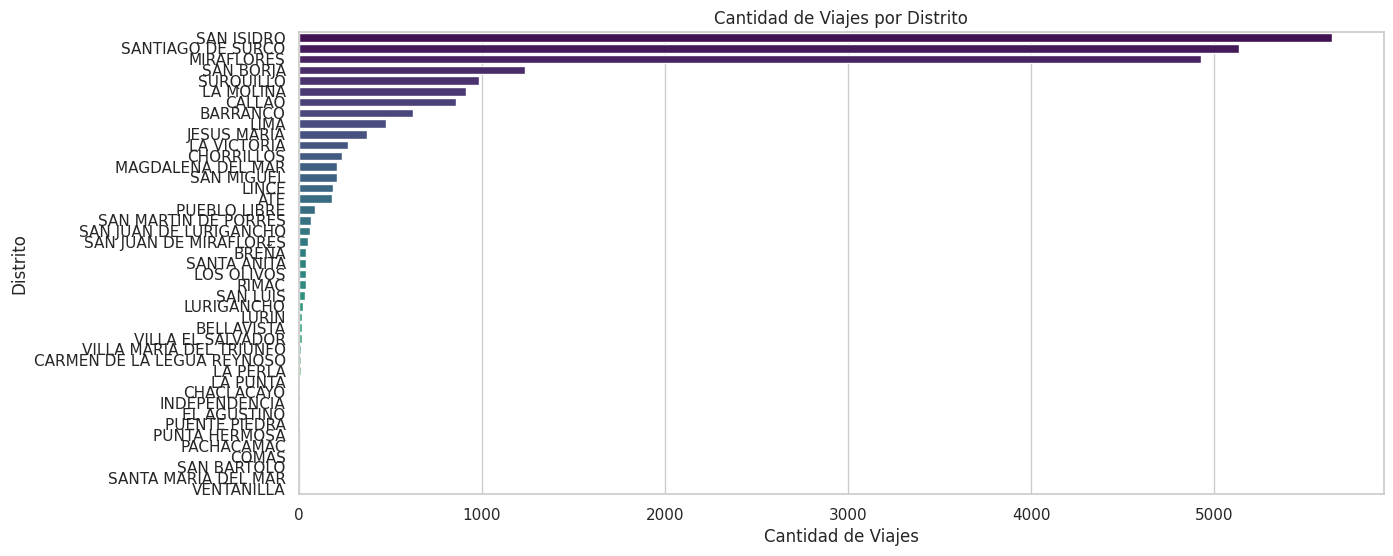

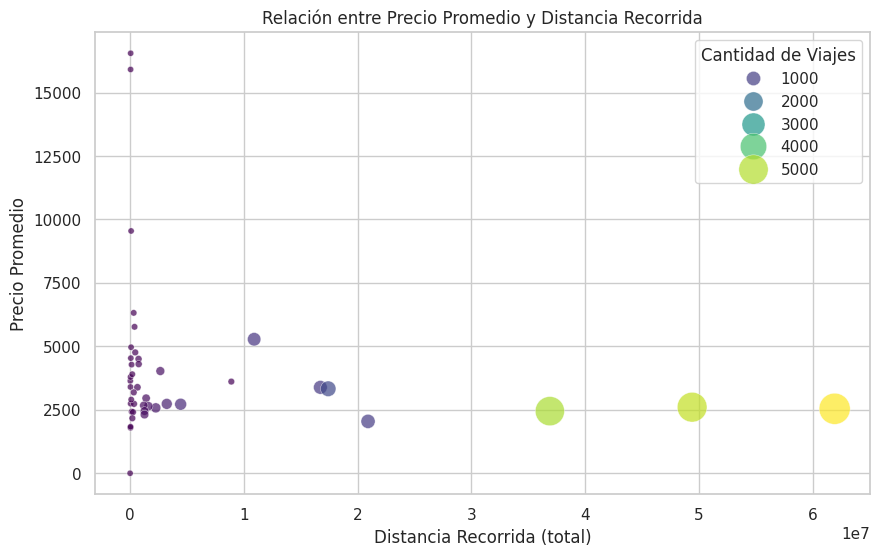

             distrito  cantidad_viajes  precio_promedio  distancia_recorrida
30         SAN ISIDRO             5643      2540.388789           61911306.0
38  SANTIAGO DE SURCO             5134      2602.895755           49389217.0
22         MIRAFLORES             4925      2447.356731           36887070.0
29          SAN BORJA             1233      3329.310855           17407420.0
39          SURQUILLO              981      2044.014493           20908732.0
12          LA MOLINA              911      3384.642377           16719847.0
4              CALLAO              856      5279.665459           10900810.0
1            BARRANCO              624      2718.758170            4441424.0
16               LIMA              478      2733.158351            3222187.0
11        JESUS MARIA              374      2576.541311            2258311.0


In [ ]:
distrito_stats = data_geo_dis.groupby('distrito').agg({
    'journey_id': 'count',
    'price': 'mean',
    'distance': 'sum'
}).reset_index()

# Renombramos las columnas para mayor claridad
distrito_stats.columns = ['distrito', 'cantidad_viajes', 'precio_promedio', 'distancia_recorrida']

# Configuración de estilo
sns.set(style="whitegrid")

# Gráfico de barras para cantidad de viajes
plt.figure(figsize=(14, 6))
sns.barplot(data=distrito_stats.sort_values('cantidad_viajes', ascending=False), x='cantidad_viajes', y='distrito', palette='viridis')
plt.title('Cantidad de Viajes por Distrito')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Distrito')
plt.show()

# Gráfico de dispersión para relación entre precio y distancia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=distrito_stats, x='distancia_recorrida', y='precio_promedio', hue='cantidad_viajes', size='cantidad_viajes', sizes=(20, 500), alpha=0.7, palette='viridis')
plt.title('Relación entre Precio Promedio y Distancia Recorrida')
plt.xlabel('Distancia Recorrida (total)')
plt.ylabel('Precio Promedio')
plt.legend(title='Cantidad de Viajes')
plt.show()


# Crear una tabla con las métricas calculadas
distrito_stats = data_geo_dis.groupby('distrito').agg({
    'journey_id': 'count',
    'price': 'mean',
    'distance': 'sum'
}).reset_index()

# Renombramos las columnas para mayor claridad
distrito_stats.columns = ['distrito', 'cantidad_viajes', 'precio_promedio', 'distancia_recorrida']

# Mostramos la tabla
print(distrito_stats.sort_values('cantidad_viajes', ascending=False).head(10))  # Mostramos solo los 10 primeros distritos


## Distritos con Mayor Cantidad de Viajes:

- SAN ISIDRO: Con 5643 viajes, este distrito es el que más actividad tiene. Esto puede deberse a ser un área comercial o de negocios con alta demanda de transporte.
- SANTIAGO DE SURCO: Con 5134 viajes, también muestra una alta actividad, lo que sugiere que puede ser un distrito residencial con buena conectividad.
- MIRAFLORES: Con 4925 viajes, este distrito es conocido por su vida nocturna y su atractivo turístico, lo que podría explicar su alto número de viajes.

## Precios Promedio por Viaje:

- SAN BORJA tiene el precio promedio más alto, con 3329.31 unidades. Esto podría indicar que los viajes en este distrito son más largos o que la demanda es más alta, lo que permite tarifas más elevadas.
- LA MOLINA y CALLAO también presentan precios promedio altos (3384.64 y 5279.67, respectivamente), lo que podría reflejar un perfil de clientes que están dispuestos a pagar más por comodidad o calidad en su transporte.

## Distancia Recorrida Total:

- SAN ISIDRO no solo tiene la mayor cantidad de viajes, sino que también presenta la mayor distancia recorrida total (61911306.0 unidades). Esto podría significar que los viajes en este distrito son significativamente largos, o que es un punto de partida para muchos viajes que se extienden a otras áreas.
- SANTIAGO DE SURCO y MIRAFLORES también muestran distancias recorridas significativas (49389217.0 y 36887070.0), lo que refuerza la idea de que estos son distritos importantes en términos de movilidad.

## Comparación de Datos:

- A pesar de tener un número relativamente alto de viajes, LIMA y JESÚS MARÍA tienen una cantidad de viajes y distancias recorridas más bajas, lo que puede indicar que estos distritos están más centralizados y posiblemente con una mayor oferta de transporte público.
- BARRANCO, aunque tiene un número de viajes más bajo (624), presenta un precio promedio de 2718.76, lo que sugiere que los usuarios están dispuestos a pagar un precio razonable por los viajes en este distrito, tal vez debido a su carácter turístico.

##Conclusiones

**Estrategias de Negocio:** Si se esta considerando estrategias de negocio o marketing para un servicio de transporte, se podria enfocar en distritos como San Isidro y Santiago de Surco puede ser beneficioso debido a su alta actividad y volumen de viajes.

**Factores que Influyen en el Precio**: Los precios elevados en ciertos distritos pueden estar influenciados por la longitud de los viajes o la oferta de servicios premium. Sería útil investigar más sobre el tipo de clientes en esos distritos.

**Oportunidades de Crecimiento:** Distritos como Barranco, a pesar de tener menos viajes, pueden presentar oportunidades para aumentar la visibilidad y promoción de servicios de transporte, especialmente durante eventos o temporadas turísticas.

## 2. Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.

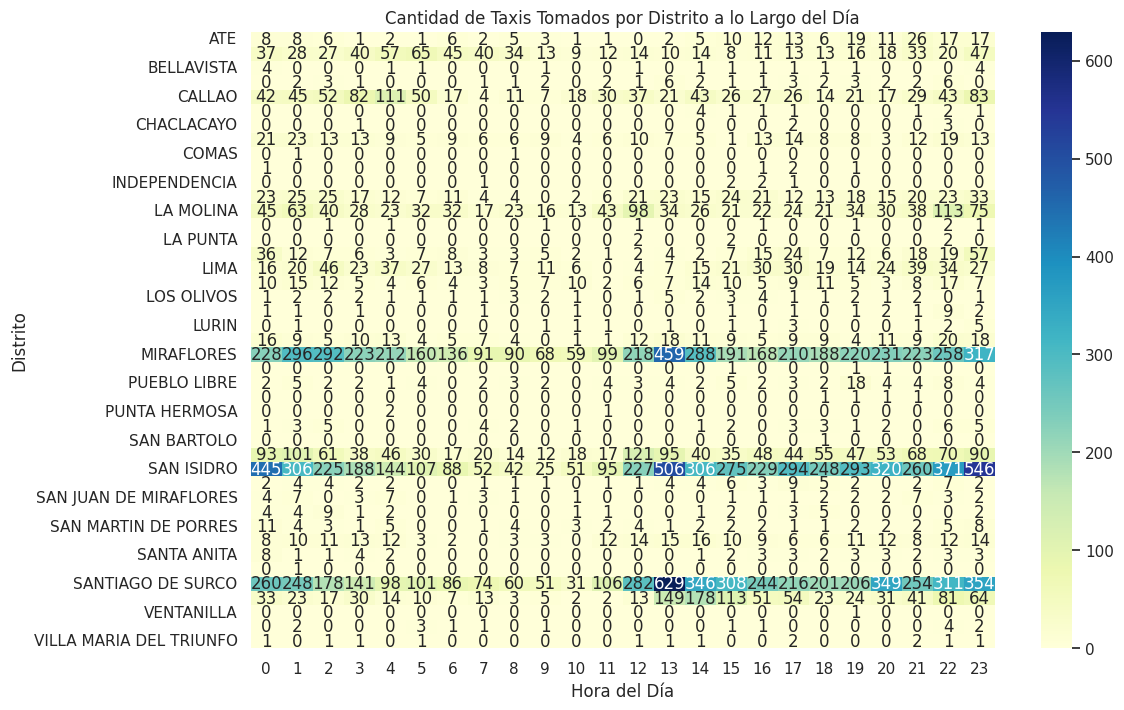

hour                           0      1      2      3      4      5      6   \
distrito                                                                      
ATE                           8.0    8.0    6.0    1.0    2.0    1.0    6.0   
BARRANCO                     37.0   28.0   27.0   40.0   57.0   65.0   45.0   
BELLAVISTA                    4.0    0.0    0.0    0.0    1.0    1.0    0.0   
BREÑA                         0.0    2.0    3.0    1.0    0.0    0.0    0.0   
CALLAO                       42.0   45.0   52.0   82.0  111.0   50.0   17.0   
CARMEN DE LA LEGUA REYNOSO    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
CHACLACAYO                    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
CHORRILLOS                   21.0   23.0   13.0   13.0    9.0    5.0    9.0   
COMAS                         0.0    1.0    0.0    0.0    0.0    0.0    0.0   
EL AGUSTINO                   1.0    0.0    0.0    0.0    0.0    0.0    0.0   
INDEPENDENCIA                 0.0    0.0    0.0    0

In [ ]:
patrones_viajes = data_geo_dis.groupby(['distrito', 'hour']).size().reset_index(name='cantidad_viajes')

# Crear una tabla pivote para facilitar la visualización
tabla_pivote = patrones_viajes.pivot(index='distrito', columns='hour', values='cantidad_viajes').fillna(0)

# Visualizar los datos con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_pivote, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Cantidad de Taxis Tomados por Distrito a lo Largo del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Distrito")
plt.show()

# Mostrar la tabla de resumen
print(tabla_pivote)


**Distribución de Taxis por Distrito:**

- Miraflores y San Isidro tienen una cantidad notablemente alta de taxis, lo que puede reflejar una mayor demanda de transporte en estas áreas, posiblemente debido a su actividad comercial y turística.

- Carmen de la Legua Reynoso y Ventanilla, con registros de cero, pueden indicar una menor oferta de taxis o menos necesidad de transporte en esas zonas.

**Patrones de Demanda:**

- Los picos en ciertos horarios, como en Miraflores durante las horas 12 y 13, sugieren que hay un aumento en la demanda de taxis en esos momentos, lo que podría coincidir con horarios de mayor actividad comercial o movimiento de personas.

- Distritos como San Borja y Lima muestran variaciones en los registros, lo que podría indicar que la demanda de taxis fluctúa más en estas áreas, tal vez influenciada por eventos o actividades específicas en esos momentos.

**Tendencias Horarias:**

- la mayoría de los taxis están más activos en la tarde, esto podría sugerir que las personas prefieren usar taxis para regresar a casa después del trabajo o actividades.
- Por otro lado, los distritos con pocos o ningún taxi registrado podrían estar experimentando menos tráfico, lo que podría ser un punto a considerar para la planificación de servicios de transporte.

**Impacto en el Transporte Público:**

- Un alto número de taxis en ciertos distritos podría ser una indicación de que las personas prefieren este medio de transporte en lugar del transporte público, lo que podría tener implicaciones para la planificación del sistema de transporte en general.

## 3. Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?


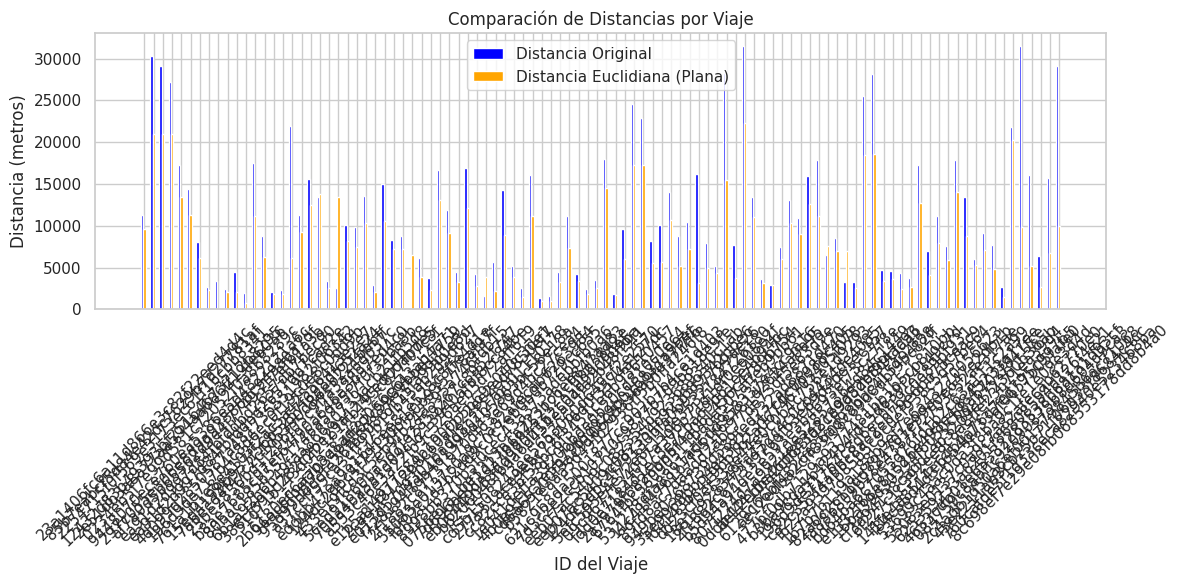

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

data_geo_dis = data_geo.sjoin(lima_dis[['provincia', 'distrito', 'geometry']])

# Reemplazar comas por puntos y convertir a float
data_geo_dis['start_lat'] = data_geo_dis['start_lat'].str.replace(',', '.').astype(float)
data_geo_dis['start_lon'] = data_geo_dis['start_lon'].str.replace(',', '.').astype(float)
data_geo_dis['end_lat'] = data_geo_dis['end_lat'].str.replace(',', '.').astype(float)
data_geo_dis['end_lon'] = data_geo_dis['end_lon'].str.replace(',', '.').astype(float)

# Calcular la distancia euclidiana en metros considerando la Tierra como plana
def euclidean_distance_flat(lat1, lon1, lat2, lon2):
    # Conversión de diferencias de latitud y longitud a metros
    lat_dist = (lat2 - lat1) * 111320  # distancia en metros por diferencia de latitud
    lon_dist = (lon2 - lon1) * 111320 * math.cos(math.radians((lat1 + lat2) / 2))  # distancia en metros por diferencia de longitud
    return np.sqrt(lat_dist**2 + lon_dist**2)

# Filtrar registros donde 'distance' no es nulo y no es cero
data_geo_dis = data_geo_dis[(data_geo_dis['distance'].notnull()) & (data_geo_dis['distance'] != 0)]

# Calcular la distancia euclidiana
data_geo_dis['euclidean_distance'] = data_geo_dis.apply(
    lambda row: euclidean_distance_flat(row['start_lat'], row['start_lon'], row['end_lat'], row['end_lon']),
    axis=1
)

# Preparar los datos para el gráfico
# Selecciona un subconjunto de filas para graficar (opcional)
data_subset = data_geo_dis[['journey_id', 'distance', 'euclidean_distance']].head(100)

# Configurar el gráfico
bar_width = 0.25
x = np.arange(len(data_subset['journey_id']))

# Crear las barras para las distancias
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, data_subset['distance'], width=bar_width, label='Distancia Original', color='blue')
plt.bar(x, data_subset['euclidean_distance'], width=bar_width, label='Distancia Euclidiana (Plana)', color='orange')

# Configurar etiquetas y título
plt.xlabel('ID del Viaje')
plt.ylabel('Distancia (metros)')
plt.title('Comparación de Distancias por Viaje')
plt.xticks(x, data_subset['journey_id'], rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [ ]:
# Calcular proporción entre distancia euclidiana y distancia original
data_geo_dis['proporción'] = data_geo_dis['euclidean_distance'] / data_geo_dis['distance']

# Filtrar las proporciones que no superen 1
proporciones_validas = data_geo_dis[data_geo_dis['proporción'] <= 1]['proporción']

# Calcular el promedio de las proporciones válidas
promedio_proporciones = proporciones_validas.mean()

# Mostrar las proporciones válidas y el promedio
print("Proporciones válidas:")
print(proporciones_validas)
print("\nPromedio de las Proporciones Válidas:", promedio_proporciones)



Proporciones válidas:
0        0.847175
4        0.694002
5        0.723004
6        0.772193
7        0.778329
           ...   
23105    0.686498
23106    0.494995
23107    0.568034
23108    0.728654
23109    0.860610
Name: proporción, Length: 15133, dtype: float64

Promedio de las Proporciones Válidas: 0.6544461916826819


**Distancia Euclidiana vs. Distancia Real:**
Para la toma de datos , se encontro datos anomalos, donde la relacion de una distancia y una euclideana era casi 12, esto se debe a la mala toma de registros, tambine no se considero las distacias que marcaban cero.

- La distancia euclidiana calcula la distancia "en línea recta" entre dos puntos en un espacio bidimensional. Esto se hace usando la fórmula de Pitágoras y no toma en cuenta el terreno, obstáculos, o la ruta real que se siguió.
- La columna distance en tus datos probablemente representa la distancia real recorrida durante el viaje, que puede incluir giros, cambios de ruta, y otros factores que afectan la longitud del trayecto.

- Rango de Proporciones: Las proporciones válidas varían desde aproximadamente 0.494995 hasta 0.860610, lo que indica que, en muchos casos, la distancia euclidiana (que considera la Tierra como plana) es menor que la distancia original. Esto sugiere que la forma de calcular las distancias a través de la geometría euclidiana puede subestimar las distancias reales en un contexto geográfico.

- Promedio de Proporciones: El promedio de las proporciones válidas es 0.6544, lo que implica que, en promedio, la distancia euclidiana representa alrededor del 65.44% de la distancia original. Este promedio sugiere que, aunque las distancias euclidianas son significativamente menores que las distancias reales, siguen siendo un indicador razonable de la distancia en un contexto donde se asume un planeta plano.

- Implicaciones: El hecho de que las proporciones sean generalmente inferiores a 1 sugiere que las distancias originales tienden a ser más largas. Esto podría ser esperado, ya que el cálculo euclidiano no toma en cuenta la curvatura de la Tierra y, por lo tanto, no es capaz de capturar completamente las complejidades de la geografía.


## 4. Hay patronoes diferenciados sobre el uso de web,Android o Iphone por cada distrito?


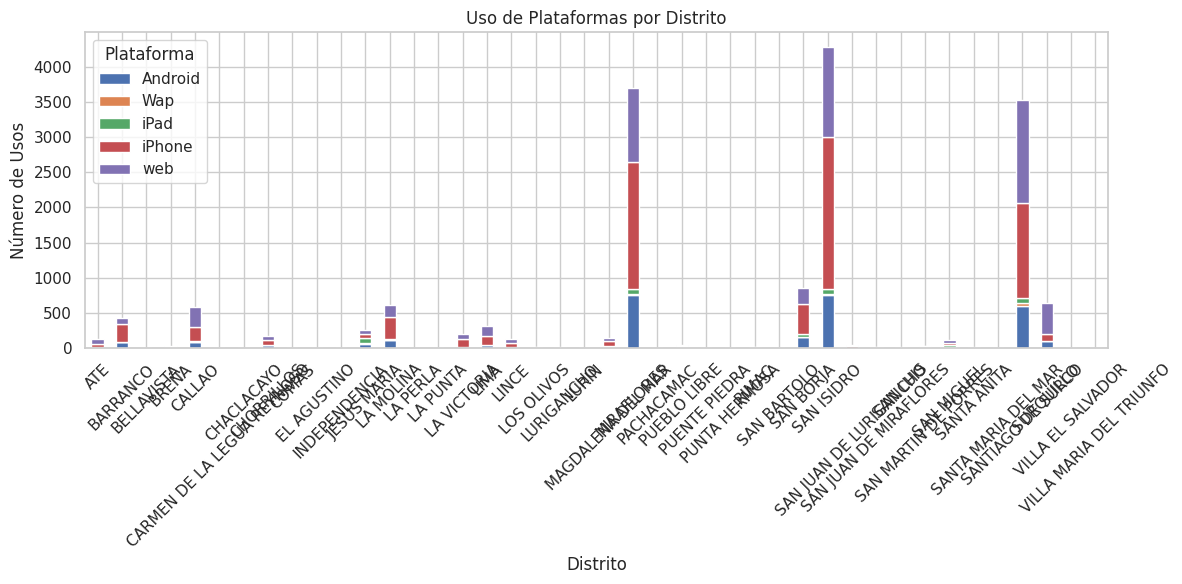

In [ ]:
uso_por_distrito = data_geo_dis.groupby(['distrito', 'source']).size().unstack(fill_value=0)

# Visualización
uso_por_distrito.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Uso de Plataformas por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de Usos')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

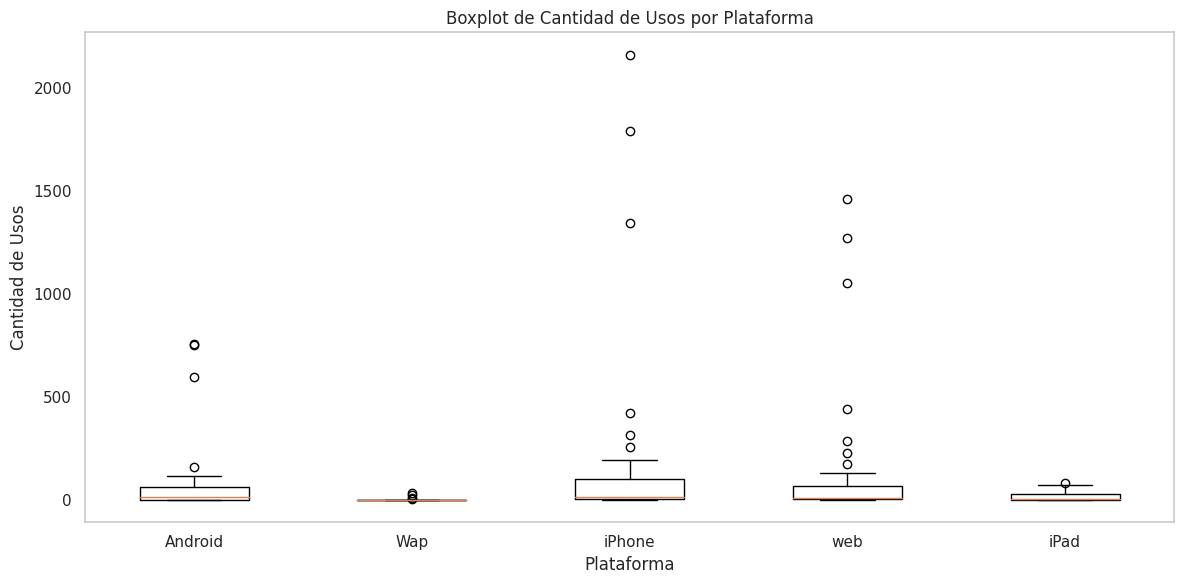

source                      Android   Wap  iPad  iPhone     web
distrito                                                       
ATE                            15.0   1.0   0.0    49.0    66.0
BARRANCO                       84.0   2.0   2.0   257.0    80.0
BELLAVISTA                      4.0   0.0   0.0     4.0     0.0
BREÑA                           5.0   0.0   0.0     9.0    18.0
CALLAO                         91.0   4.0  10.0   197.0   289.0
CARMEN DE LA LEGUA REYNOSO      0.0   0.0   0.0     2.0     7.0
CHACLACAYO                      0.0   0.0   0.0     0.0     1.0
CHORRILLOS                     48.0   2.0   3.0    69.0    51.0
COMAS                           1.0   0.0   0.0     0.0     0.0
EL AGUSTINO                     2.0   0.0   0.0     0.0     3.0
INDEPENDENCIA                   0.0   0.0   0.0     2.0     2.0
JESUS MARIA                    69.0   1.0  71.0    69.0    50.0
LA MOLINA                     117.0   2.0  10.0   314.0   178.0
LA PERLA                        2.0   0.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Contar la cantidad de usos por plataforma y distrito
usage_count = data_geo_dis.groupby(['distrito', 'source']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.boxplot([usage_count[usage_count['source'] == platform]['count'] for platform in usage_count['source'].unique()],
            labels=usage_count['source'].unique())
plt.title('Boxplot de Cantidad de Usos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de Usos')
plt.grid(False)

plt.tight_layout()
plt.show()

# Tabla de conteo por distrito y plataforma
usage_table = usage_count.pivot(index='distrito', columns='source', values='count').fillna(0)
print(usage_table)


**Dominio de iPhone:**

El uso del iPhone es particularmente alto en distritos como Miraflores (1792 usos) y San Isidro (2162 usos). Esto indica que en estos distritos, los usuarios prefieren utilizar iPhones para acceder a los servicios.

**Uso Moderado de Android:**

La plataforma Android presenta un uso considerable en varios distritos, pero en general es menor en comparación con el iPhone. Por ejemplo, en San Isidro, el uso de Android es 758, que aunque es significativo, no alcanza los niveles del uso de iPhone en el mismo distrito. En Callao, el uso de Android también es alto (91), lo que sugiere que esta plataforma tiene una base de usuarios fiel.

**Preferencia por la Web:**

La plataforma web tiene una presencia fuerte en casi todos los distritos, con un uso notable en Miraflores (1053) y San Isidro (1272). Esto sugiere que muchos usuarios optan por acceder a los servicios a través de navegadores en lugar de aplicaciones nativas, lo cual puede ser un indicativo de la preferencia por la accesibilidad.

**Concentración en Distritos Urbanos:**

La tendencia muestra que los distritos más urbanizados como Miraflores, San Isidro y Lima presentan un uso significativamente más alto tanto en iPhone como en plataformas web. Esto podría estar relacionado con un mejor acceso a tecnología y un mayor nivel socioeconómico en estas áreas.

**Comparación entre Plataformas:**

En general, el uso de iPhone supera al de Android en la mayoría de los distritos analizados. La diferencia es especialmente marcada en distritos como San Isidro, donde el uso de iPhone (2162) es mucho más alto que el de Android (758). Esto podría indicar una preferencia de marca entre los usuarios de estos distritos.

## 5. Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos, y hay alguna influencia en el precio?


Tomamos en cuenta esto, segun https://www.infobae.com/america/peru/2022/07/20/que-es-lima-moderna-y-que-distritos-la-conforman/

Barranco, Breña, Jesús María, La Victoria, Lima, Lince, Magdalena del Mar, Miraflores, Pueblo Libre, Rímac, San Borja, San Isidro, San Miguel, Santiago de Surco y Surquillo.



           Tipo  Distancia Promedio  Precio Promedio
0     Céntricos        13709.409678      3367.045286
1  No Céntricos        25359.994363      5836.018049


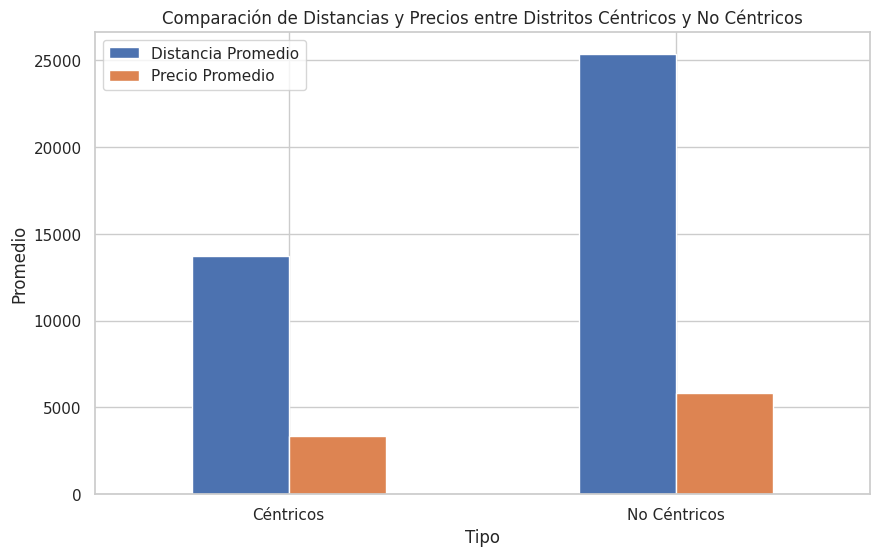

In [ ]:



distritos_centrales = [
    "BARRANCO", "BREÑA", "JESUS MARIA", "LA VICTORIA", "LIMA",
    "LINCE", "MAGDALENA DEL MAR", "MIRAFLORES", "PUEBLO LIBRE",
    "RIMAC", "SAN BORJA", "SAN ISIDRO", "SAN MIGUEL",
    "SANTIAGO DE SURCO", "SURQUILLO"
]

# Filtrar el DataFrame para los distritos céntricos
data_centros = data_geo_dis[data_geo_dis['distrito'].isin(distritos_centrales)]

# Calcular la distancia y el precio promedio para distritos céntricos
promedio_distancia_centro = data_centros['distance'].mean()
promedio_precio_centro = data_centros['price'].mean()

# Filtrar el DataFrame para los distritos no céntricos
data_no_centros = data_geo_dis[~data_geo_dis['distrito'].isin(distritos_centrales)]

# Calcular la distancia y el precio promedio para distritos no céntricos
promedio_distancia_no_centro = data_no_centros['distance'].mean()
promedio_precio_no_centro = data_no_centros['price'].mean()

# Crear un DataFrame para los resultados
resultados = pd.DataFrame({
    'Tipo': ['Céntricos', 'No Céntricos'],
    'Distancia Promedio': [promedio_distancia_centro, promedio_distancia_no_centro],
    'Precio Promedio': [promedio_precio_centro, promedio_precio_no_centro]
})

print(resultados)

# Visualización
import matplotlib.pyplot as plt

resultados.set_index('Tipo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Distancias y Precios entre Distritos Céntricos y No Céntricos')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.show()


## Análisis de Viajes



| Tipo            | Distancia Promedio (m) | Precio Promedio (moneda) |
|-----------------|-------------------------|---------------------------|
| Céntricos       | 13,709.41               | 3,367.05                  |
| No Céntricos    | 25,359.99               | 5,836.02                  |



1. **Distancia Promedio**:
   - Los viajes en **distritos céntricos** tienen una **distancia promedio** de aproximadamente **13,709.41 metros** (o **13.71 km**).
   - En contraste, los **distritos no céntricos** muestran una **distancia promedio** significativamente mayor de aproximadamente **25,359.99 metros** (o **25.36 km**).
   - Esto sugiere que, en general, los viajes en áreas más céntricas son **más cortos** en comparación con aquellos en distritos periféricos.

2. **Precio Promedio**:
   - El **precio promedio** de los viajes en **distritos céntricos** es de aproximadamente **3,367.05** (moneda local).
   - Para los **distritos no céntricos**, el precio promedio es considerablemente más alto, alcanzando aproximadamente **5,836.02** (moneda local).
   - Esta diferencia en el costo podría estar relacionada con la mayor distancia de los viajes en áreas no céntricas, lo que implica que los precios están influenciados por la longitud de los viajes.

### Conclusión

El análisis indica que los **distritos céntricos** tienden a tener viajes **más cortos** y **más económicos** en comparación con los **distritos no céntricos**. Esta información puede ser útil para los operadores de servicios de taxi y para la planificación urbana, ya que muestra cómo la ubicación puede influir en la experiencia de viaje de los usuarios.


## 6. Se observa que hay muchos viajes que inician o terminan en el Aeropuerto. Existe algún patrón desde/hacia donde van generalmente esos viajes?
Incluya cualquier otra información relevante que se puede derivar del análisis geo espacial.

### Considerando las coordenadas del aeropuerto segun esta fuente
- Coordenadas-12.021529515728194, -77.10830717528682

- Uilizo un margen de 0.01 para la longitud y latitud


In [ ]:
from IPython.display import IFrame

# Incrusta el iframe del mapa
url = "https://www.google.com/maps/embed?pb=!1m14!1m8!1m3!1d20348.216974719664!2d-77.10749598162259!3d-12.021775744360593!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x9105cc3d52f51e01%3A0x1f75ae97fb12652c!2sInternational%20Airport%20Jorge%20Ch%C3%A1vez!5e0!3m2!1ses!2spe!4v1730039194590!5m2!1ses!2spe"
IFrame(url, width=600, height=450)


In [ ]:
#instalamos kepler
!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922317 sha256=9606f92a438d05a60cd2f49c90b2d4fdba153f4c780c3d2bd718e52c4f8c5db7
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl

# Coordenadas objetivo
target_coordinates = (-12.022076690160842, -77.10791556455236)

# Rango de tolerancia para encontrar viajes cercanos
tolerance = 0.01

# Filtrar viajes que parten cerca del punto de referencia
start_near = data_geo_dis[
    (data_geo_dis['start_lat'].between(target_coordinates[0] - tolerance, target_coordinates[0] + tolerance)) &
    (data_geo_dis['start_lon'].between(target_coordinates[1] - tolerance, target_coordinates[1] + tolerance))
]

# Filtrar viajes que llegan cerca del punto de referencia
end_near = data_geo_dis[
    (data_geo_dis['end_lat'].between(target_coordinates[0] - tolerance, target_coordinates[0] + tolerance)) &
    (data_geo_dis['end_lon'].between(target_coordinates[1] - tolerance, target_coordinates[1] + tolerance))
]

# Preparar datos para Kepler.gl (dos capas: viajes de ida y de llegada)
start_points = start_near[['start_lat', 'start_lon']].rename(columns={'start_lat': 'latitude', 'start_lon': 'longitude'})
end_points = end_near[['end_lat', 'end_lon']].rename(columns={'end_lat': 'latitude', 'end_lon': 'longitude'})

# Crear DataFrame para el punto rojo (coordenada objetivo)
target_df = pd.DataFrame({
    'latitude': [target_coordinates[0]],
    'longitude': [target_coordinates[1]]
})

# Crear un mapa Kepler.gl
map_kepler = KeplerGl(height=600)

# Agregar capas al mapa
map_kepler.add_data(data=start_points, name='Puntos de Inicio')
map_kepler.add_data(data=end_points, name='Puntos de Fin')

# Agregar el punto rojo como una capa adicional
map_kepler.add_data(data=target_df, name='Coordenada de Referencia')

# Mostrar el mapa
map_kepler


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Puntos de Inicio': {'index': [5, 42, 44, 89, 117, 124, 181, 262, 301, 304, 309, 338, 355, 368,…

In [ ]:
import pandas as pd
import geopandas as gpd

# Cargar los límites de los distritos de Lima y Callao
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

# Coordenadas del aeropuerto (referencia)
airport_coordinates = (-12.022076690160842, -77.10791556455236)

# Crear GeoDataFrame para las rutas
data_geo_dis = gpd.GeoDataFrame(
    data_geo_dis, geometry=gpd.points_from_xy(data_geo_dis['longitude'], data_geo_dis['latitude']),
    crs="EPSG:4326"
)

# 1. Contar las salidas al aeropuerto
outbound_to_airport = data_geo_dis[data_geo_dis.apply(
    lambda row: ((row['latitude'] - airport_coordinates[0])**2 + (row['longitude'] - airport_coordinates[1])**2) < 0.01**2, axis=1)]
outbound_count = outbound_to_airport['distrito'].value_counts().reset_index()
outbound_count.columns = ['Distrito', 'Salidas al Aeropuerto']

# 2. Contar las llegadas desde el aeropuerto
inbound_from_airport = data_geo_dis[data_geo_dis.apply(
    lambda row: ((row['end_lat'] - airport_coordinates[0])**2 + (row['end_lon'] - airport_coordinates[1])**2) < 0.01**2, axis=1)]
inbound_count = inbound_from_airport['distrito'].value_counts().reset_index()
inbound_count.columns = ['Distrito', 'Llegadas desde el Aeropuerto']

# Combinar resultados en una tabla final
resultados = pd.merge(outbound_count, inbound_count, on='Distrito', how='outer').fillna(0)

# Convertir la cantidad de viajes a enteros
resultados['Salidas al Aeropuerto'] = resultados['Salidas al Aeropuerto'].astype(int)
resultados['Llegadas desde el Aeropuerto'] = resultados['Llegadas desde el Aeropuerto'].astype(int)

# Mostrar la tabla de resultados
print("Cantidad de viajes por distrito desde/hacia el aeropuerto:")
print(resultados)

# Si estás en Colab, puedes usar display() para una mejor visualización
from IPython.display import display
display(resultados)


Cantidad de viajes por distrito desde/hacia el aeropuerto:
                  Distrito  Salidas al Aeropuerto  \
0                      ATE                      0   
1                 BARRANCO                      0   
2                   CALLAO                    489   
3               CHORRILLOS                      0   
4              JESUS MARIA                      0   
5                LA MOLINA                      0   
6                 LA PERLA                      0   
7              LA VICTORIA                      0   
8                     LIMA                      0   
9                    LINCE                      0   
10              LOS OLIVOS                      0   
11       MAGDALENA DEL MAR                      0   
12              MIRAFLORES                      0   
13            PUEBLO LIBRE                      0   
14                   RIMAC                      0   
15               SAN BORJA                      0   
16              SAN ISIDRO              

Distrito  Salidas al Aeropuerto  \
0                      ATE                      0   
1                 BARRANCO                      0   
2                   CALLAO                    489   
3               CHORRILLOS                      0   
4              JESUS MARIA                      0   
5                LA MOLINA                      0   
6                 LA PERLA                      0   
7              LA VICTORIA                      0   
8                     LIMA                      0   
9                    LINCE                      0   
10              LOS OLIVOS                      0   
11       MAGDALENA DEL MAR                      0   
12              MIRAFLORES                      0   
13            PUEBLO LIBRE                      0   
14                   RIMAC                      0   
15               SAN BORJA                      0   
16              SAN ISIDRO                      0   
17  SAN JUAN DE LURIGANCHO                      0   
18  SAN JUAN DE MIRAFLORES                      0   
19                SAN LUIS                      0   
20    SAN MARTIN DE PORRES                      0   
21              SAN MIGUEL                      0   
22             SANTA ANITA                      0   
23       SANTIAGO DE SURCO                      0   
24               SURQUILLO                      0   

    Llegadas desde el Aeropuerto  
0                              4  
1                             42  
2                             11  
3                             18  
4                              8  
5                             57  
6                              3  
7                              9  
8                             16  
9                             12  
10                             1  
11                             7  
12                           282  
13                             7  
14                             1  
15                            59  
16                           265  
17                             6  
18                             2  
19                             2  
20                             4  
21                            17  
22                             3  
23                           199  
24                            11

## Resultados

**Salidas al Aeropuerto:**

- El distrito de Callao es el único que presenta un número significativo de salidas hacia el aeropuerto, con 489 viajes registrados.
- Todos los demás distritos muestran 0 viajes, lo que sugiere que las personas que utilizan taxis para llegar al aeropuerto generalmente provienen del Callao.

**Llegadas desde el Aeropuerto:**

- Se observa un flujo considerable de llegadas desde el aeropuerto hacia varios distritos. Entre los que destacan se encuentran:

  - Miraflores: 282 llegadas
  - San Isidro: 265 llegadas
  - Santiago de Surco: 199 llegadas

  - Otros distritos como Barranco, San Borja, y La Molina también muestran un número notable de llegadas, aunque no alcanzan los niveles de Miraflores y San Isidro.

**Origen de los Pasajeros:**

- La alta cantidad de salidas hacia el aeropuerto desde Callao sugiere que este distrito es un punto clave para los pasajeros que requieren transporte al aeropuerto, posiblemente debido a su proximidad geográfica.

**Destinos de los Pasajeros:**

- Las llegadas desde el aeropuerto a otros distritos como Miraflores y San Isidro indican que estos son destinos populares para los viajeros que aterrizan. Esto puede reflejar la ubicación de hoteles, oficinas, y atracciones turísticas en estos distritos.

**Planificación y Políticas de Transporte:**
- La información podría ser útil para las autoridades locales al considerar la planificación de rutas de transporte público y servicios de taxi, así como en la gestión de la demanda en el aeropuerto.
- También podría influir en el desarrollo de servicios de transporte privado y alternativas de movilidad, dado el flujo asimétrico de pasajeros.

## 7. Informacion de  rutas entre distritos

In [ ]:
trayectorias = pd.DataFrame({
    'journey_id': data_geo_dis['journey_id'],
    'start_lat': data_geo_dis['start_lat'],
    'start_lon': data_geo_dis['start_lon'],
    'end_lat': data_geo_dis['end_lat'],
    'end_lon': data_geo_dis['end_lon'],
})

# Mostrar el DataFrame preparado
print(trayectorias)

                             journey_id  start_lat  start_lon    end_lat  \
0      23a1406fc6a11d866e3c82f22eed4d4c -12.139835 -77.023560 -12.055370   
4      85b7eabcf5d84e42dc7629b7d27781af -12.089954 -76.926270 -12.022232   
5      2254715f0f569e3173ec61f16cbb8341 -12.022419 -77.106506 -12.089802   
6      12432d83b49393bf25164673212b8295 -12.089958 -76.926209 -12.021523   
7      2e51db3a8a77aa594aa686ff19fe6036 -12.113472 -77.043854 -12.091087   
...                                 ...        ...        ...        ...   
23105  a7b77e5e6e60dc427d96d8d22ac91032 -12.093179 -77.071632 -12.121559   
23106  4a18ea5737ce0ffecaf20b305a0e2c86 -12.089741 -77.046997 -12.083527   
23107  f1e4317f2c17991dd90d1cd17ae0d399 -12.092530 -77.028753 -12.077760   
23108  1e44c0fd0a266c3719ff30410b257bce -12.127564 -77.026423 -12.105298   
23109  7073883383b89ad289e864022150cdd7 -12.019468 -77.107767 -12.099100   

         end_lon  
0     -77.041321  
4     -77.106384  
5     -76.926086  
6     -77.1

In [ ]:
map_1 = KeplerGl()

map_1.add_data(data=trayectorias, name="Trayectorias Taxis")

# Mostrar el mapa
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Trayectorias Taxis': {'index': [0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21, 23, 2…

- La información obtenida al visualizar las trayectorias de los taxis en Kepler.gl te permite observar los recorridos realizados por los vehículos, mostrando tanto rectas como curvas. Aquí te detallo lo que representan cada uno de estos elementos:

**Rectas:**

 - Conexiones Directas: Las líneas rectas entre dos puntos (coordenadas de inicio y fin) indican un trayecto directo que el taxi ha tomado, lo cual puede sugerir rutas eficientes sin paradas intermedias.

**Curvas**:

- Trayectorias Complejas: Las curvas pueden indicar cambios en la ruta debido a factores como el tráfico, la elección de rutas alternativas o las condiciones de la carretera. Esto proporciona información valiosa sobre el comportamiento del tráfico en ciertas áreas.

## 8. Densidad de los costos promdeios y relacion entre distancia promedio por distrito

In [ ]:


# Calcular costo promedio, duración promedio y distancia promedio por distrito
costos_distrito = data_geo_dis.groupby('distrito').agg(
    costo_promedio=('cost', 'mean'),
    duracion_promedio=('duration', 'mean'),
    distancia_promedio=('distance', 'mean'),
    latitud=('start_lat', 'mean'),
    longitud=('start_lon', 'mean')
).reset_index()

# Guardar el DataFrame en un archivo CSV
costos_distrito.to_csv('costos_distrito.csv', index=False)

# Crear un DataFrame para la relación costo-distancia
relacion_costo_distancia = data_geo_dis[['cost', 'distance', 'start_lat', 'start_lon']].copy()

# Guardar la relación costo-distancia en un archivo CSV
relacion_costo_distancia.to_csv('relacion_costo_distancia.csv', index=False)
costos_distrito = pd.read_csv('costos_distrito.csv')
relacion_costo_distancia = pd.read_csv('relacion_costo_distancia.csv')
mapa = KeplerGl()

# Agregar los datos de costos por distrito
mapa.add_data(data=costos_distrito, name="Costos por Distrito")

# Agregar los datos de relación costo-distancia
mapa.add_data(data=relacion_costo_distancia, name="Relación Costo-Distancia")

# Mostrar el mapa
mapa


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Costos por Distrito': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

# Análisis de Datos de Viajes en Taxi

Este análisis visualiza información clave sobre los viajes en taxi en diferentes distritos:

## 1. Costos Promedio por Distrito
- **Descripción**: Muestra el costo promedio de los viajes de taxi en cada distrito.
- **Utilidad**: Ayuda a identificar los distritos con tarifas más altas o más bajas, útil para la planificación urbana y para los usuarios de taxis.

## 2. Relación Costo-Distancia
- **Descripción**: Visualiza cómo se relacionan los costos con las distancias recorridas a través de una capa de dispersión.
- **Utilidad**: Permite determinar si los costos son proporcionales a la distancia, lo que puede indicar una estructura de precios justa o injusta.

La visualización de estos datos en Kepler.gl ofrece una representación visual clara e interactiva de los patrones de viaje en taxi, siendo especialmente útil para planificadores urbanos, analistas de transporte y usuarios interesados en el uso de taxis en la ciudad.

